## Business Understanding

#### Overview

##### What is sepsis?
Sepsis is a life-threatening medical emergency caused by your body’s overwhelming response to an infection. Without urgent treatment, it can lead to tissue damage, organ failure and death.

Sepsis is your body’s extreme reaction to an infection. When you have an infection, your immune system works to try to fight it. But sometimes your immune system stops fighting the infection and starts damaging your normal tissues and organs, leading to widespread inflammation throughout your body.

At the same time, an abnormal chain reaction in your clotting system can cause blood clots to form in your blood vessels. This reduces blood flow to the different organs of your body and can cause significant damage or even failure.

##### What are the three stages of sepsis?
Healthcare providers used to organize sepsis into three stages: sepsis, severe sepsis and septic shock. Now, they identify the condition on a more fluid scale. This scale ranges from infection and bacteremia (bacteria in your bloodstream) to sepsis and septic shock, which can lead to dysfunction of multiple organs and even death.

##### Who does sepsis affect?
Sepsis can affect anyone, but people with any kind of infection, especially bacteremia, are at a particularly high risk.

Other people who are at a high risk include:

People older than 65 years old, newborns and infants, and pregnant people.
People with medical conditions such as diabetes, obesity, cancer and kidney disease.
People with weakened immune systems.
People who are in the hospital for other medical reasons.
People with severe injuries, such as large burns or wounds.
People with catheters, IVs or breathing tubes.

##### How common is sepsis?

More than 1.7 million people in the United States receive a diagnosis of sepsis each year. There are differences in sepsis rates among different demographic groups. Sepsis is more common among older adults, with incidence increasing with each year after the age of 65 years old.
[Source](https://my.clevelandclinic.org/health/diseases/12361-sepsis)


#### Objective

The goal of this project is to create an API using FastAPI framework to predict if one is will be Positive or Negative for Sepsis

### Metric

Due to the life threatening nature of Sepsis it will be dangerous to predictive Negative if actual turns out to be Positive, ML model will seek to increase the **Precision score**

#### Dataset Description:

    The provided data is a modified version of a publicly available data source, and is subject to copyright.

Donor of database:

                     - The Johns Hopkins University
                     - Johns Hopkins Road
                     - Laurel, MD 20707
                     - (301) 953-6231

Licence agreement:

    The dataset can only be used for the purpose of this assignment. Sharing or distributing this data or using this data for any other commercial or non-commercial purposes is prohibited.


**Data Dictionary**
- ID: number to represent patient ID
- PRG: Plasma glucose
- PL: Blood Work Result-1 (mu U/ml)
- PR: Blood Pressure (mm Hg)
- SK: Blood Work Result-2 (mm)
- TS: Blood Work Result-3 (mu U/ml)
- M11: Body mass index (weight in kg/(height in m)^2)
- BD2: Blood Work Result-4 (mu U/ml)
- Age: patients age (years)
- Insurance: If a patient holds a valid insurance card
- Sepsis: Positive: if a patient in ICU will develop a sepsis , and Negative: otherwise



#### ANALYTICAL QUESTIONS

1) What is the proportion of patients with a valid insurance card?

2) What is the distribution of body mass index (BMI) in the dataset?

3) How does blood pressure (PR) vary with age among patients?

4) Does the presence of valid insurance affect the likelihood of developing sepssis?

5) What is the link between Age, Body mass index (M11) and Sepsis

#### HYPOTHESIS
1) 
The null hypothesis : Patient's Insurance does not influence Sepssis

The alternate hypothesis : Patient's Insurance influences Sepssis

2) 
The null hypothesis : There is no correlation between Blood Work Result-1 (PL) and Blood Work Result-2 (SK)

The alternate hypothesis : There is a correlation between Blood Work Result-1 (PL) and Blood Work Result-2 (SK)

3) 
The null hypothesis : - There is no correlation between blood pressure (PR) and the likelihood of developing sepsis?

The alternate hypothesis : There is a correlation between blood pressure (PR) and the likelihood of developing sepsis?

4) 
The null hypothesis : Age does not have a significant impact on the development of sepsis in patients

The alternate hypothesis : Age has a significant impact on the development of sepsis in patients

5) 
The null hypothesis: There a no significant difference in plasma glucose levels between patients who develop sepsis and those who do not?

The Alternative hypothesis: There is a significant difference in plasma glucose levels between patients who develop sepsis and those who do not?

6) 
The Null Hypothesis (H0): There is no significant difference in Blood Work Results between patients who develop sepssis and those who do not.

The Alternative Hypothesis (H1): There is a significant difference in Blood Work Results between patients who develop sepsis and those who do not.

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 

from scipy.stats import chi2_contingency
import scipy.stats as stats
from scipy.stats import pearsonr
from scipy.stats import mannwhitneyu

from scipy.stats import ttest_ind

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (
    OneHotEncoder, 
    LabelEncoder, 
    RobustScaler, 
    StandardScaler,
    FunctionTransformer
)

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, mutual_info_classif 
from sklearn.model_selection import train_test_split 


from Custom_Transformers import LogTransformer, SqrtTransformer, BoxCoxTransformer


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, 
    GradientBoostingClassifier
)

from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.linear_model import HuberRegressor

from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    roc_curve,
    auc, 
    confusion_matrix, 
    classification_report
)

from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.calibration import CalibratedClassifierCV
from scipy.stats import chi2_contingency
import joblib



import warnings
warnings.filterwarnings('ignore')


In [98]:
pfiles_df = pd.read_csv('/Users/mac/Documents/P5-Machine-Learning-API/Data/Paitients_Files_Train.csv')

### Exploratory Data Analysis: EDA

In [99]:
pfiles_df.shape

(599, 11)

In [100]:
pfiles_df.head()

ID  PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance   Sepssis
0  ICU200010    6  148  72  35    0  33.6  0.627   50          0  Positive
1  ICU200011    1   85  66  29    0  26.6  0.351   31          0  Negative
2  ICU200012    8  183  64   0    0  23.3  0.672   32          1  Positive
3  ICU200013    1   89  66  23   94  28.1  0.167   21          1  Negative
4  ICU200014    0  137  40  35  168  43.1  2.288   33          1  Positive

In [101]:
pfiles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [102]:
pfiles_df.describe().T

count        mean         std     min     25%      50%      75%  \
PRG        599.0    3.824708    3.362839   0.000   1.000    3.000    6.000   
PL         599.0  120.153589   32.682364   0.000  99.000  116.000  140.000   
PR         599.0   68.732888   19.335675   0.000  64.000   70.000   80.000   
SK         599.0   20.562604   16.017622   0.000   0.000   23.000   32.000   
TS         599.0   79.460768  116.576176   0.000   0.000   36.000  123.500   
M11        599.0   31.920033    8.008227   0.000  27.100   32.000   36.550   
BD2        599.0    0.481187    0.337552   0.078   0.248    0.383    0.647   
Age        599.0   33.290484   11.828446  21.000  24.000   29.000   40.000   
Insurance  599.0    0.686144    0.464447   0.000   0.000    1.000    1.000   

              max  
PRG         17.00  
PL         198.00  
PR         122.00  
SK          99.00  
TS         846.00  
M11         67.10  
BD2          2.42  
Age         81.00  
Insurance    1.00

In [103]:
pfiles_df.isnull().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

In [104]:
pfiles_df.duplicated().sum()

np.int64(0)

##### OBSERVATION

- There are no missing values in the dataset.
- There are no duplicates in the dataset.
- The average age of patients is recorded as 33 years, with a minimum age of 21 years and a maximum age of 81 years.
- The average body mass index (BMI) is recorded as 31.99 kg/m², with the highest BMI being 67 kg/m².

#### Univariate Analysis

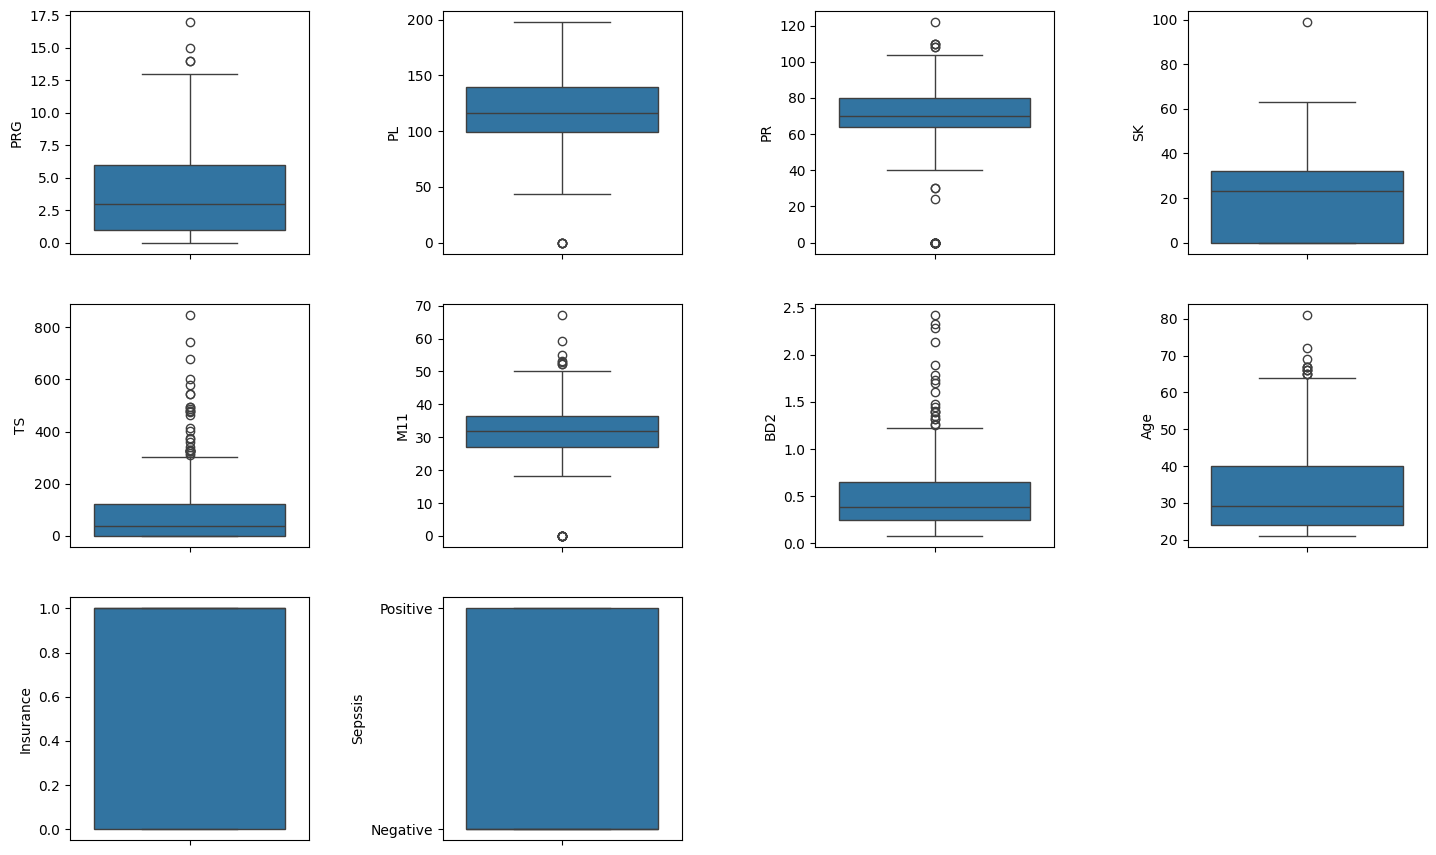

In [105]:
pfiles_df_noid = pfiles_df.drop(['ID'], axis=1)

plt.figure(figsize=(15, 15))

for i, variable in enumerate(pfiles_df_noid):
    plt.subplot(5,4, i + 1)
    sns.boxplot(pfiles_df,y=pfiles_df[variable])
    plt.tight_layout(pad=3)
    plt.xticks(rotation=45)

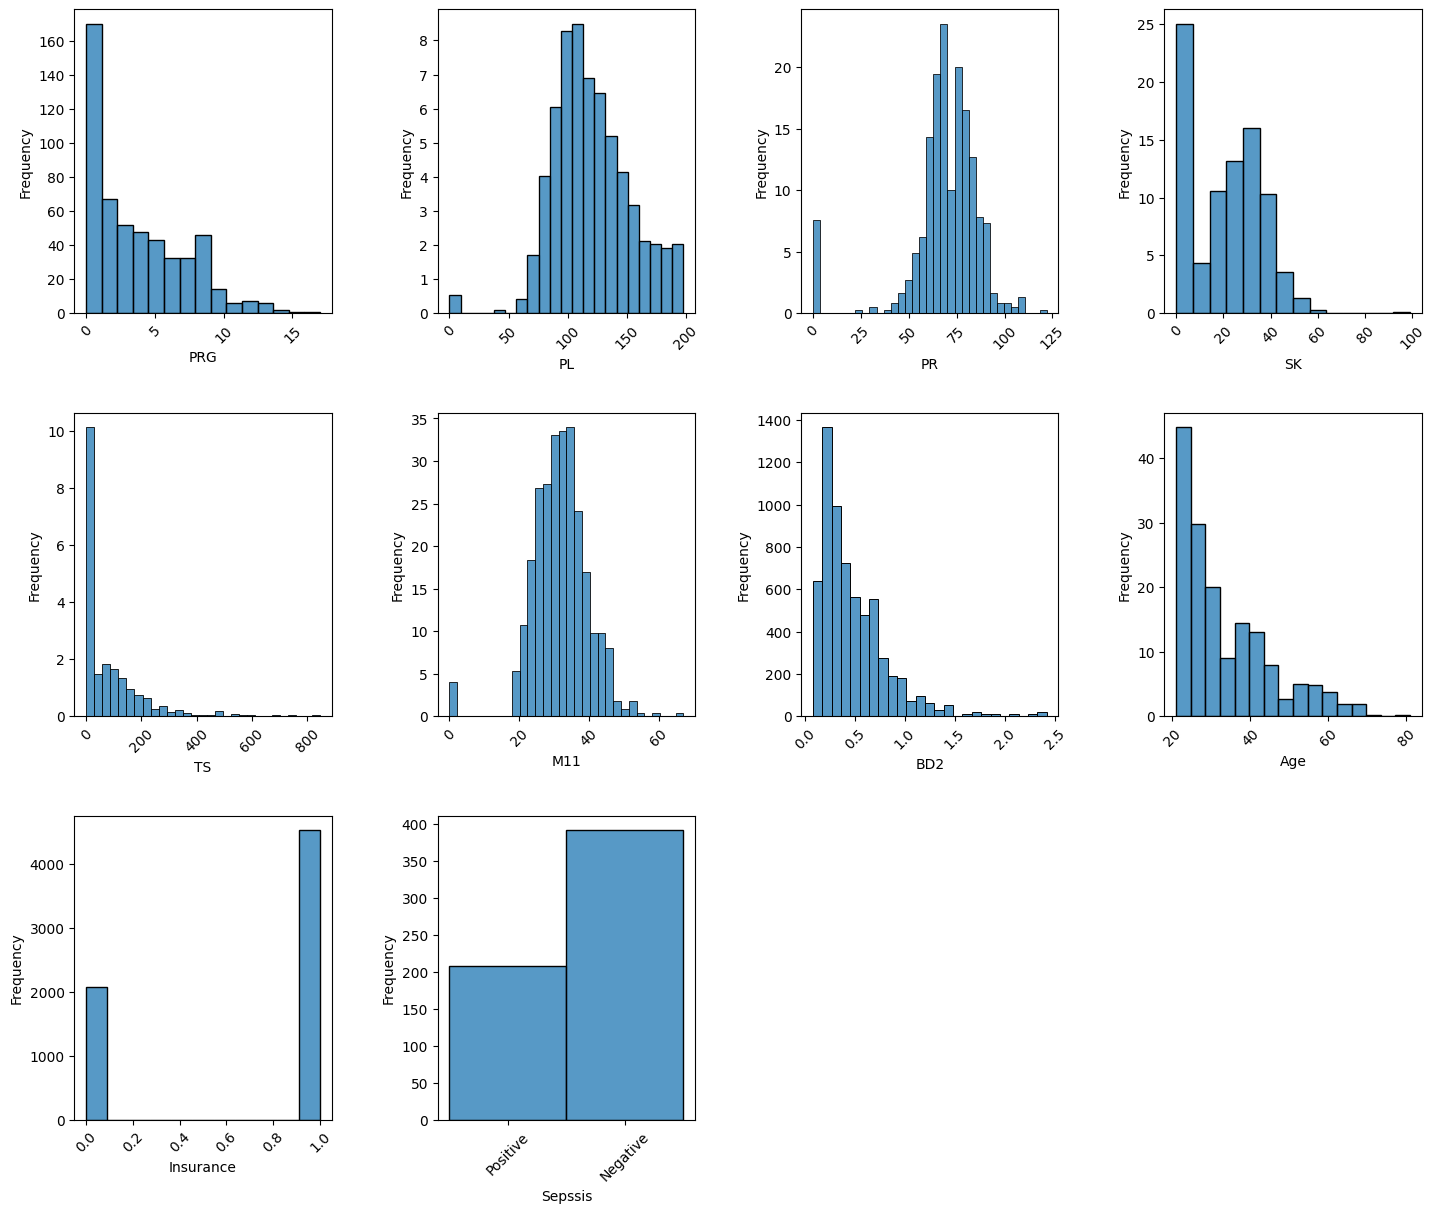

In [106]:
plt.figure(figsize=(15, 20))

for i, variable in enumerate(pfiles_df_noid):
    plt.subplot(5,4, i + 1)
    sns.histplot(pfiles_df,x=pfiles_df[variable], stat='frequency')
    plt.tight_layout(pad=3)
    plt.xticks(rotation=45)

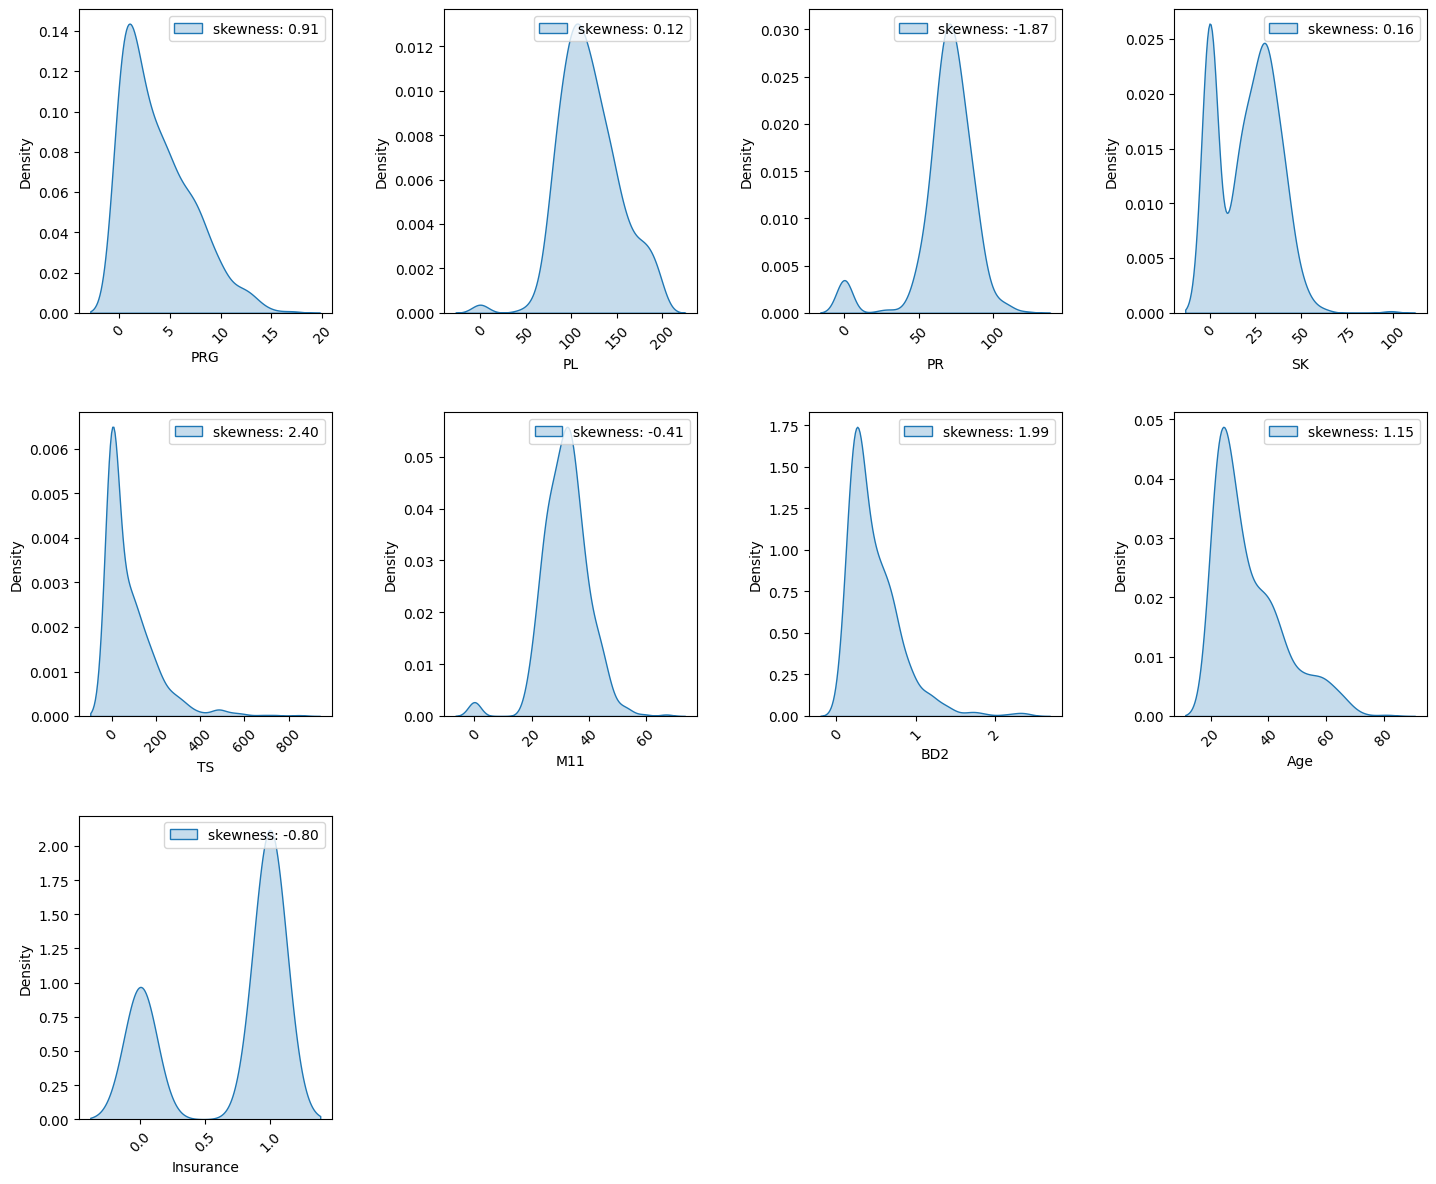

In [107]:
# Plot a Kernel density plot for the variables
plt.figure(figsize=(15, 20))

for i, variable in enumerate(pfiles_df_noid.drop(['Sepssis'], axis=1)):
    plt.subplot(5,4, i + 1)
    sns.kdeplot(pfiles_df,x=pfiles_df[variable],label= 'skewness: %.2f'%(pfiles_df[variable].skew()), fill = True,)
    plt.tight_layout(pad=3)
    plt.legend(loc = 'upper right')
    plt.xticks(rotation=45)

##### OBSERVATION
- Few variables show Negative skewness such as Insurance, Body Mass index (M11), Blood pressure (PR)
- Other variables show Positive skewness of which some have high posiitive skewness e.g Blood work result 3 (TS) and Blood work result 4 (BD2), while some have low posiitive skewness e.g Plasma glucose (PRG), Age, Blood Work result 2(SK), Blood Work result 1 (PL)

#### Bivariate & Multivariate Analysis

In [108]:
# Filter out non-numerical columns
numerical_columns = pfiles_df.select_dtypes(include=['number']).columns

# Create a new DataFrame with only numerical columns
pfiles_numerical = pfiles_df[numerical_columns]

# Separate the DataFrame into positive and negative sepsis cases
pfiles_positive = pfiles_numerical[pfiles_df['Sepssis'] == 'Positive']
pfiles_negative = pfiles_numerical[pfiles_df['Sepssis'] == 'Negative']

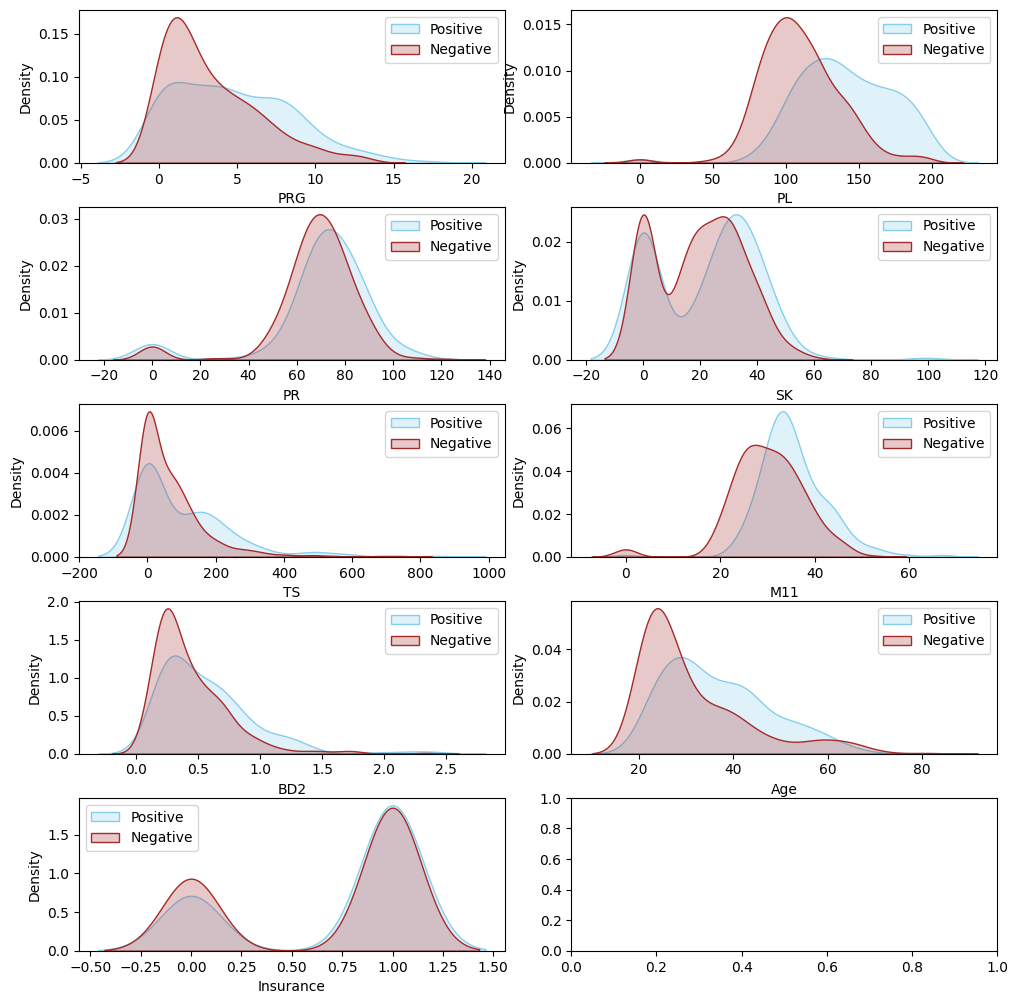

In [109]:
# Plot a kernel density plot for the negative and positive sepssis within all variables
num_rows, num_cols = 5, 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))
fig.tight_layout()

for index, column in enumerate(numerical_columns):
    ax = axes[index // num_cols, index % num_cols]
    sns.kdeplot(pfiles_positive[column], color='skyblue', fill=True, ax=ax, label='Positive')
    sns.kdeplot(pfiles_negative[column], color='brown', fill=True, ax=ax, label='Negative')
    ax.set_xlabel(column)
    ax.legend()
plt.show()

<Axes: ylabel='Density'>

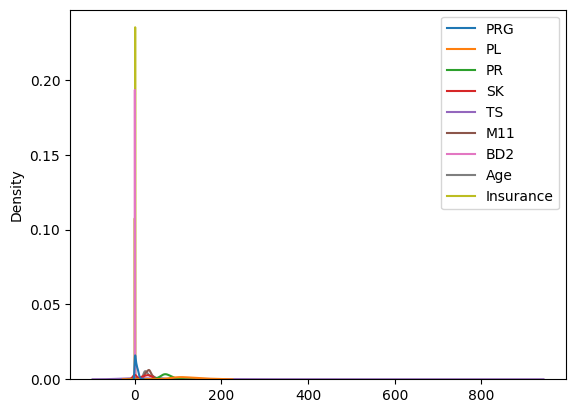

In [110]:
sns.kdeplot(data=pfiles_df_noid)

<Axes: ylabel='Density'>

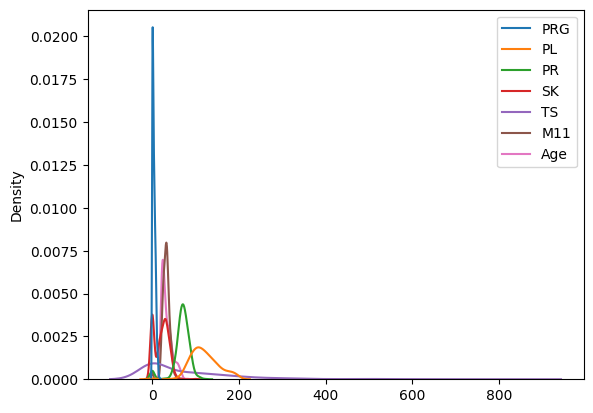

In [111]:
sns.kdeplot(data=pfiles_df_noid.drop(['Insurance','BD2'], axis=1))

<Axes: ylabel='Density'>

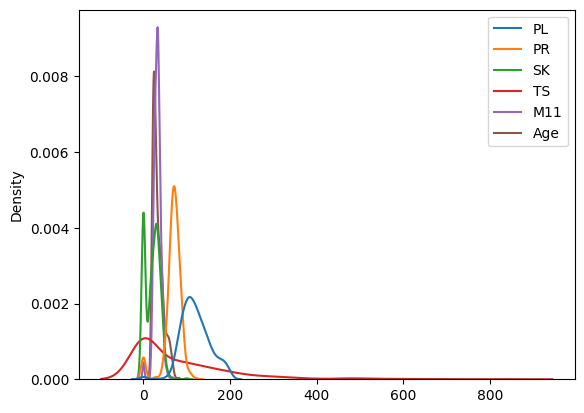

In [112]:
sns.kdeplot(data=pfiles_df_noid.drop(['Insurance','BD2', 'PRG'], axis=1))

<Axes: ylabel='Density'>

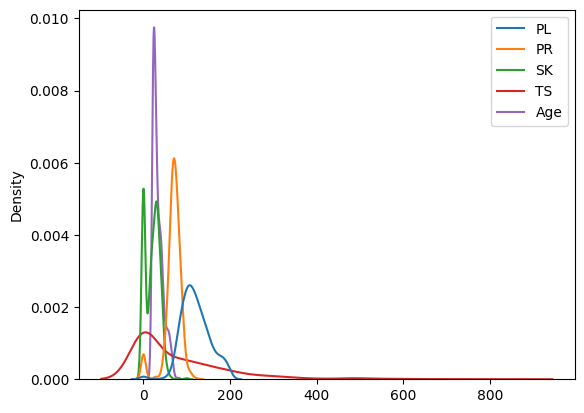

In [113]:
sns.kdeplot(data=pfiles_df_noid.drop(['Insurance','BD2', 'PRG', 'M11'], axis=1))

In [114]:
pfiles_df_noid.drop(['Sepssis'], axis=1).skew()

PRG          0.914008
PL           0.116180
PR          -1.874662
SK           0.164063
TS           2.401585
M11         -0.405255
BD2          1.989472
Age          1.152353
Insurance   -0.804257
dtype: float64

<Axes: >

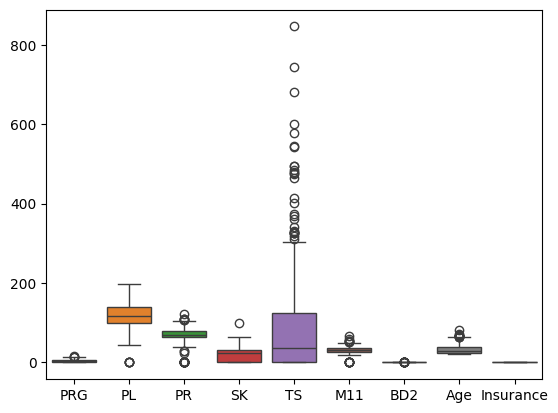

In [115]:
sns.boxplot(data=pfiles_df_noid)

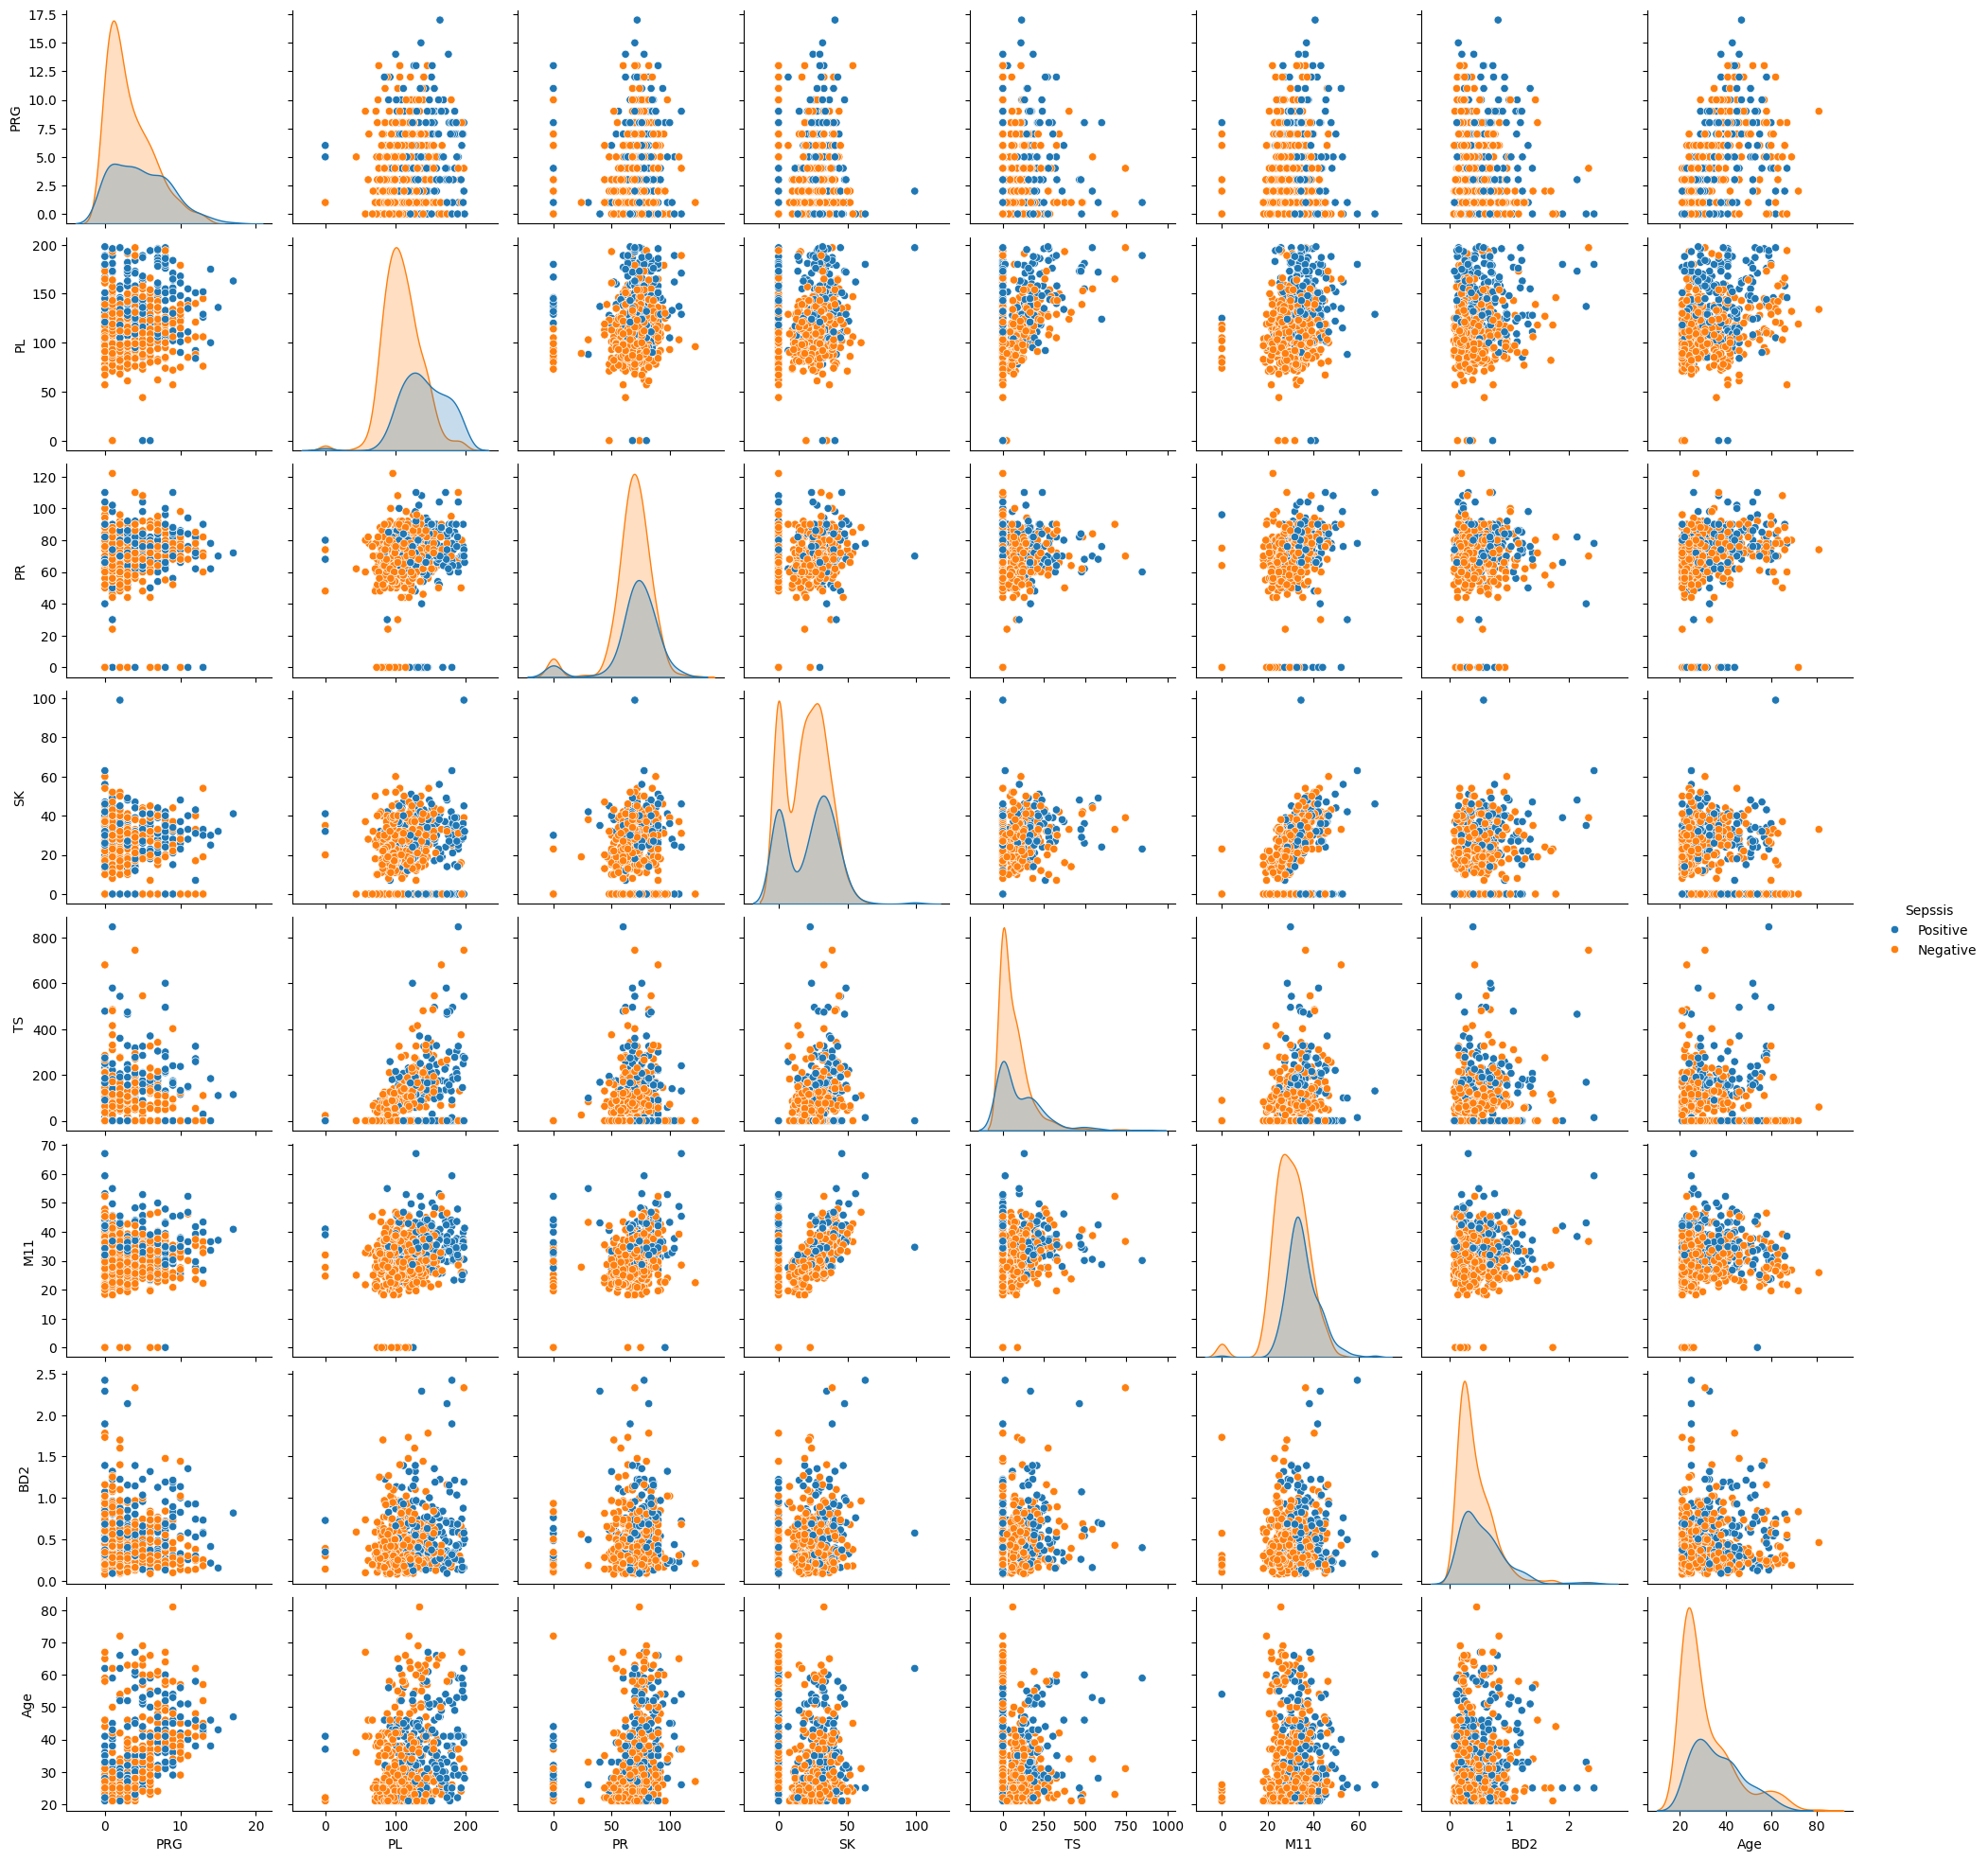

In [116]:
sns.pairplot(data=pfiles_df_noid.drop(['Insurance'], axis=1), hue='Sepssis')

<Axes: >

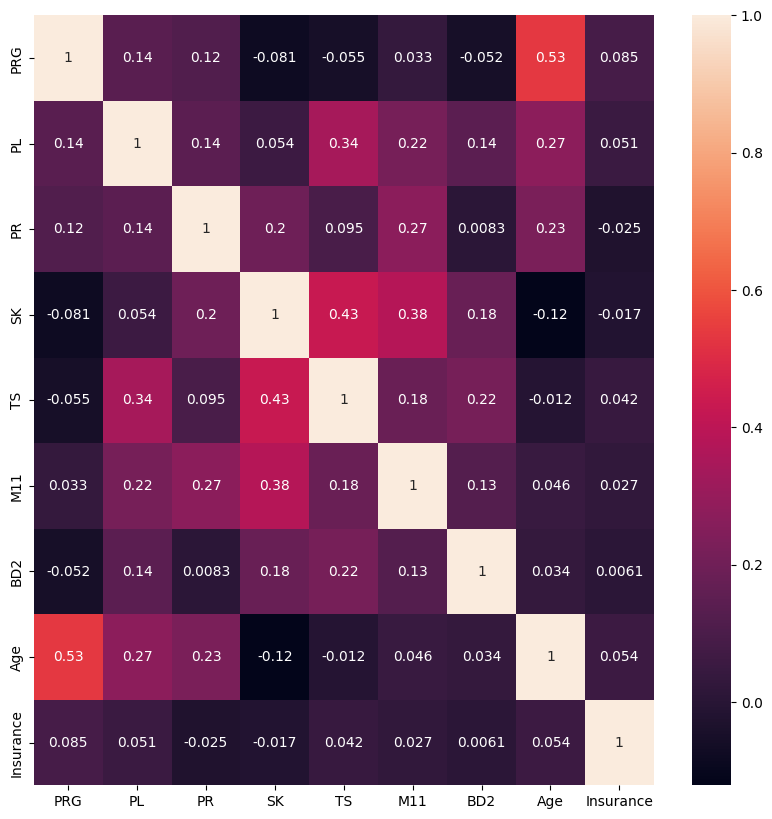

In [117]:
plt.figure(figsize=(10, 10))
sns.heatmap(data=pfiles_df_noid.drop(['Sepssis'], axis=1).corr(), annot=True)

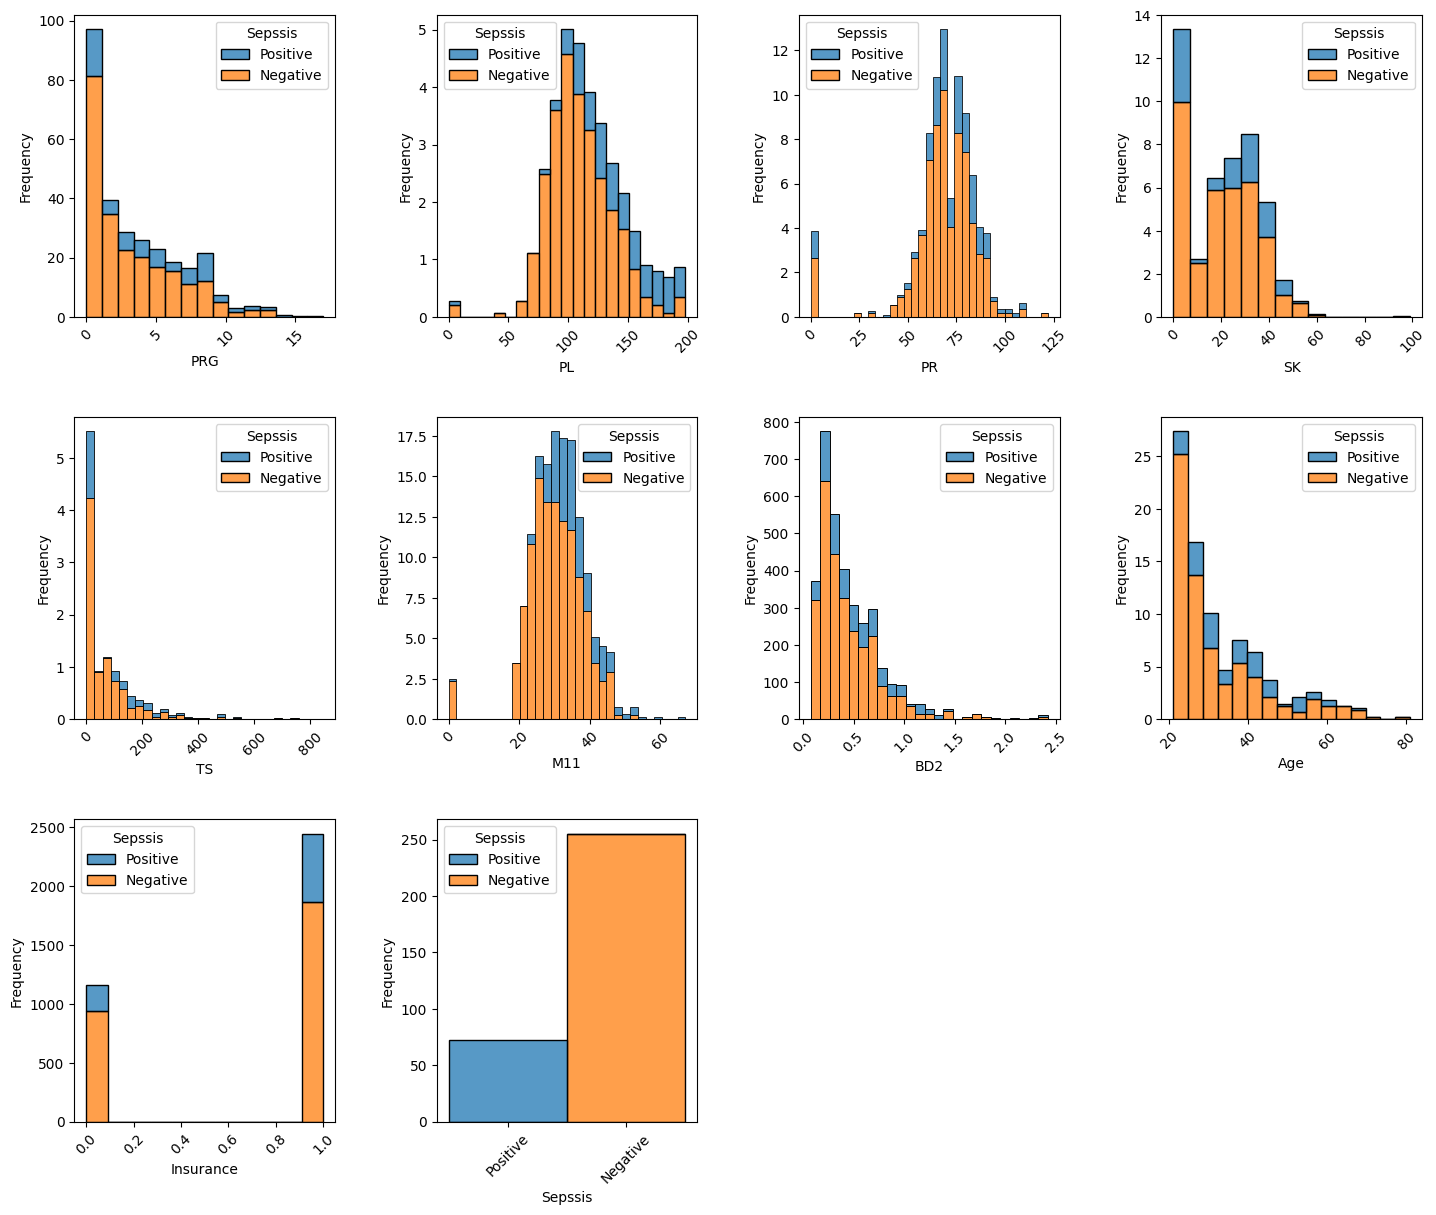

In [118]:
plt.figure(figsize=(15, 20))

for i, variable in enumerate(pfiles_df_noid):
    plt.subplot(5,4, i + 1)
    sns.histplot(pfiles_df,x=pfiles_df[variable], stat='frequency', hue='Sepssis', multiple='stack')
    plt.tight_layout(pad=3)
    plt.xticks(rotation=45)

##### OBSERVATION
- Blood work result -2 (SK) and Blood work result -3 (TS) has a good positive correlation, same goes with AGE and Plasma glucose (PRG)
- Positive sepssis and negative sepsis are skewly distributed within the ages, although Positive sepssis is overly skewed. Same goes with Blood work result -4 (BD2) and Blood work result -3 (TS).

#### ANALYTICAL QUESTIONS

##### Question 1

What is the proportion of patients with a valid insurance card?

In [119]:
# create a copy of dataframe
pfiles = pfiles_df.copy()
# Replacing the values
pfiles['Insurance'] = pfiles['Insurance'].map({0: 'Invalid', 1: 'Valid'})

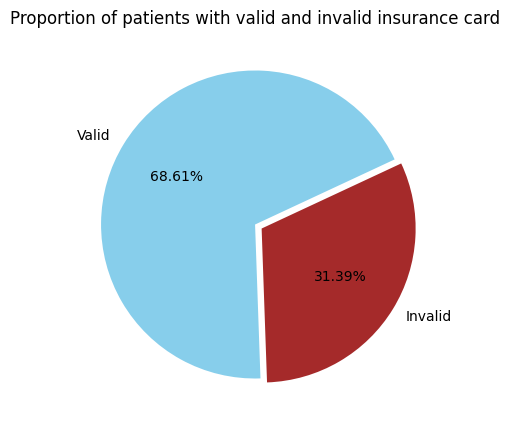

In [120]:
# Getting the counts of Insurance 
Patient_counts = pfiles['Insurance'].value_counts()
explode = [0.05 if label == 'Invalid' else 0 for label in Patient_counts.index]
# Plot a pie chart for the variables
plt.figure(figsize=(5, 5))
plt.pie(Patient_counts, labels=Patient_counts.index, explode=explode, autopct='%1.2f%%', startangle=25, colors=['skyblue', 'brown'])
plt.title('Proportion of patients with valid and invalid insurance card')
plt.show()

- The proportion of patients with valid and invalid insurance is 68.61% and 31.39% respectivel

#### Question 2

How does blood pressure (PR) vary with age among patients?

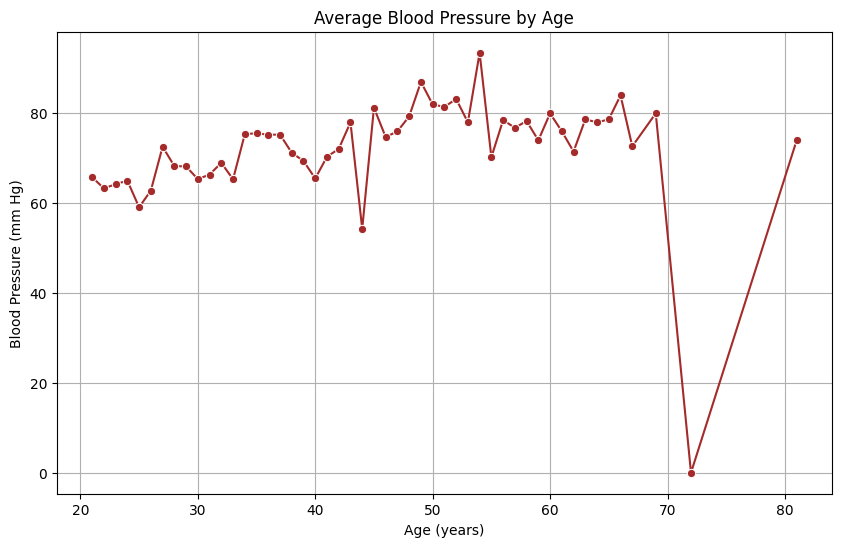

In [121]:
# Grouping the age and blood pressure and retrieving the average of PR
Age_pressure = pfiles.groupby('Age')['PR'].mean().reset_index()
# Plotting line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='PR', data=Age_pressure, marker='o', color='brown')
plt.title('Average Blood Pressure by Age')
plt.xlabel('Age (years)')
plt.ylabel('Blood Pressure (mm Hg)')
plt.grid(True)
plt.show()

- The highest average blood pressure (85mm/Hg) is recorded at 52 years of age, while the age with the lowest average blood pressure (0mm/Hg) is 71 years.

#### Question 3

Does the presence of valid insurance affect the likelihood of developing sepsis?

In [122]:
# Grouping Insurance to sepssis
insurance_sepssis = pfiles.groupby('Insurance')['Sepssis'].value_counts().reset_index()
insurance_sepssis

Insurance   Sepssis  count
0   Invalid  Negative    131
1   Invalid  Positive     57
2     Valid  Negative    260
3     Valid  Positive    151

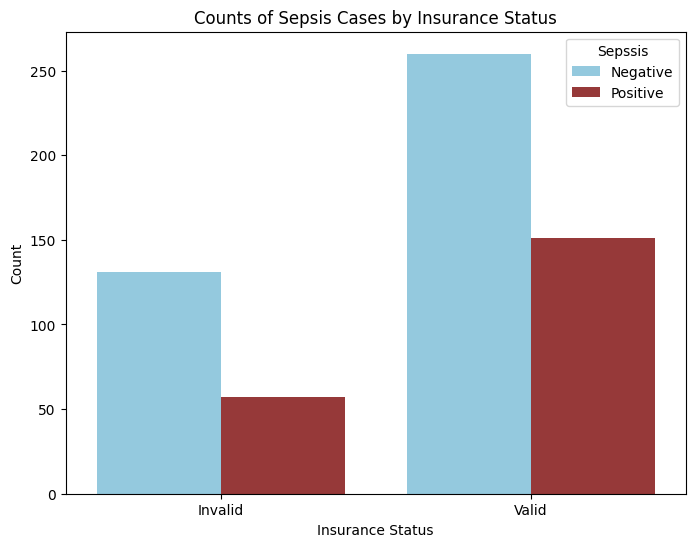

In [123]:
# Plotting bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Insurance', y='count', hue='Sepssis', data=insurance_sepssis, palette=['skyblue', 'brown'])
plt.title('Counts of Sepsis Cases by Insurance Status')
plt.xlabel('Insurance Status')
plt.ylabel('Count')
plt.show()

- The presence of valid insurance affects the likelihood of developing sepsis, mostly due to its high record rate compared to the invalid insurance rate

##### Question 4

How does the average body mass index (BMI) differ between patients who develop sepsis and those who do not?

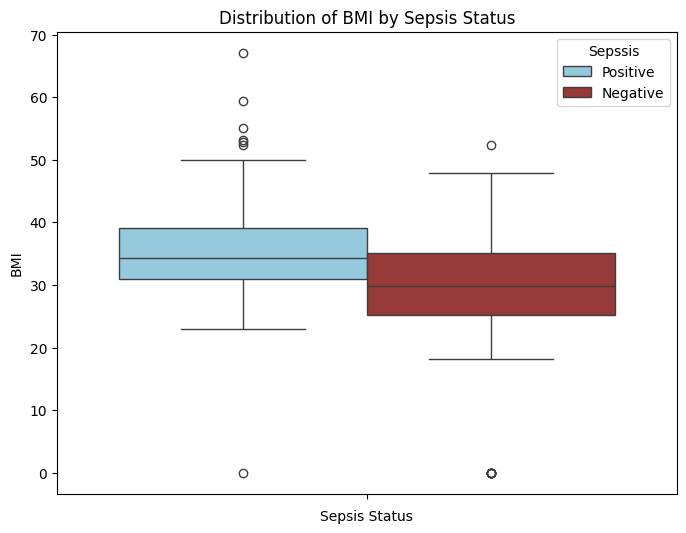

In [124]:
# Plotting box plot
plt.figure(figsize=(8, 6))
sns.boxplot(hue='Sepssis', y='M11', data=pfiles, palette=['skyblue', 'brown'], legend =True)
plt.title('Distribution of BMI by Sepsis Status')
plt.xlabel('Sepsis Status')
plt.ylabel('BMI')
plt.show()

- The average BMI (M11) Hits at 34kg with patients who test positive to sepssis, which is higher than patients who do not develop sepssis (30kg)

##### Question 5

What is the link between Age, Body mass index (M11) and Sepsis

In [125]:
pfiles

ID  PRG   PL  PR  SK   TS   M11    BD2  Age Insurance   Sepssis
0    ICU200010    6  148  72  35    0  33.6  0.627   50   Invalid  Positive
1    ICU200011    1   85  66  29    0  26.6  0.351   31   Invalid  Negative
2    ICU200012    8  183  64   0    0  23.3  0.672   32     Valid  Positive
3    ICU200013    1   89  66  23   94  28.1  0.167   21     Valid  Negative
4    ICU200014    0  137  40  35  168  43.1  2.288   33     Valid  Positive
..         ...  ...  ...  ..  ..  ...   ...    ...  ...       ...       ...
594  ICU200604    6  123  72  45  230  33.6  0.733   34   Invalid  Negative
595  ICU200605    0  188  82  14  185  32.0  0.682   22     Valid  Positive
596  ICU200606    0   67  76   0    0  45.3  0.194   46     Valid  Negative
597  ICU200607    1   89  24  19   25  27.8  0.559   21   Invalid  Negative
598  ICU200608    1  173  74   0    0  36.8  0.088   38     Valid  Positive

[599 rows x 11 columns]

In [126]:
age_m11_sep = pfiles[['Sepssis', 'M11', 'Age']]

age_m11_sep

Sepssis   M11  Age
0    Positive  33.6   50
1    Negative  26.6   31
2    Positive  23.3   32
3    Negative  28.1   21
4    Positive  43.1   33
..        ...   ...  ...
594  Negative  33.6   34
595  Positive  32.0   22
596  Negative  45.3   46
597  Negative  27.8   21
598  Positive  36.8   38

[599 rows x 3 columns]

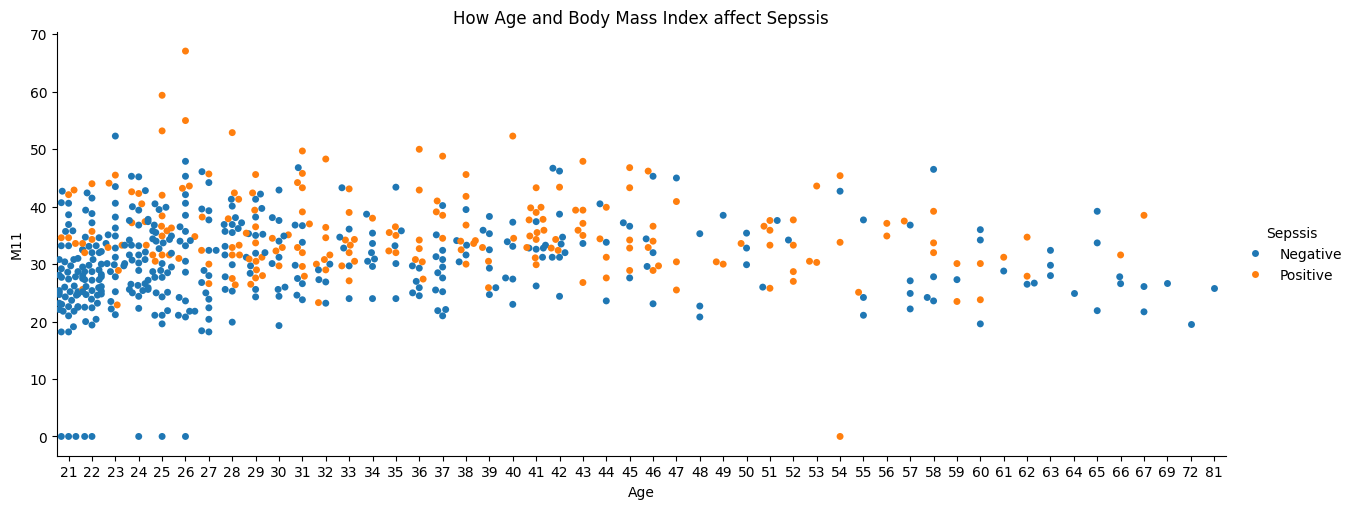

In [127]:
sns.catplot(age_m11_sep, x ='Age', y = 'M11', hue='Sepssis', kind='swarm', aspect=2.5)
plt.title('How Age and Body Mass Index affect Sepssis')
plt.show()

#### Observations

- People with M11 below 30 tend to record more negative Sepssis across all ages, but especially between ages 21 to 30

### HYPOTHESIS

1.
The null hypothesis : Patient's Insurance does not influence Sepssis

The alternate hypothesis : Patient's Insurance influences Sepssis

HYPOTHESIS TEST: CHI-SQUARE TEST OF INDEPENDENCE

In [128]:
# cross tabulate the pair
insurance_sepssis = pd.crosstab(pfiles['Insurance'], pfiles['Sepssis'])

# Perform the chi-square test
chi2, p, dof, expected  = chi2_contingency(insurance_sepssis)
# Print the results
print(f"Chi-squared:", {chi2})
print(f"p-value:", {p})
print(f"Degrees of freedom:", {dof})
print(f"Expected frequencies:", expected)
# our significance level
α = 0.05
# Comparing the p-value with α
if p < 0.05:
    print(f"As the p-value {p} is less than the level of significance, we reject that the Patient's Insurance does not influence Sepssis.")
else:
    print(f"As the p-value {p} is greater than the level of significance, we fail to reject that the Patient's Insurance does not influence Sepssis.")

Chi-squared: {np.float64(2.0712782081677066)}
p-value: {np.float64(0.1500956791860619)}
Degrees of freedom: {1}
Expected frequencies: [[122.71786311  65.28213689]
 [268.28213689 142.71786311]]
As the p-value 0.1500956791860619 is greater than the level of significance, we fail to reject that the Patient's Insurance does not influence Sepssis.


2.
The null hypothesis : There is no correlation between Blood Work Result-1 (PL) and Blood Work Result-2 (SK)

The alternate hypothesis : There is a correlation between Blood Work Result-1 (PL) and Blood Work Result-2 (SK)

HYPOTHESIS TEST: PEARSONR TEST

In [129]:
# Calculate the Pearson correlation coefficient
r, p = pearsonr(pfiles_df["PL"], pfiles_df["SK"])

print("Correlation coefficient (r):", r)
print("p-value:", p)

Correlation coefficient (r): 0.05442990074670593
p-value: 0.18340395562212572


In [130]:
# our significance level
α = 0.05
# Comparing the p-value with α
if p < α:
    print(f'As the p-value {p} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.18340395562212572 is greater than the level of significance, we fail to reject the null hypothesis.


3.
The null hypothesis : - There is no correlation between blood pressure (PR) and the likelihood of developing sepsis?

The alternate hypothesis : There is a correlation between blood pressure (PR) and the likelihood of developing sepsis?

HYPOTHESIS TEST: MANN-WHITNEY U Test:

In [131]:
Positive_PR = pfiles[pfiles['Sepssis'] == 'Positive']['PR']
Negative_PR = pfiles[pfiles['Sepssis'] == 'Negative']['PR']

# Mann-Whitney U Test
u_stat, p_val = mannwhitneyu(Positive_PR, Negative_PR)
print(f"Mann-Whitney U statistic: {u_stat}")
print(f"P-value: {p_val}")

Mann-Whitney U statistic: 47673.5
P-value: 0.0005014049708706393


In [132]:
# our significance level
α = 0.05
# Comparing the p-value with α
if p_val < 0.05:
    print(f"As the p-value {p_val} is less than the level of significance, we reject the Null Hypothesis.")
else:
    print(f"As the p-value {p_val} is greater than the level of significance, we fail to reject the Null Hypothesis.")

As the p-value 0.0005014049708706393 is less than the level of significance, we reject the Null Hypothesis.


4.
The null hypothesis : Age does not have a significant impact on the development of sepsis in patients

The alternate hypothesis : Age has a significant impact on the development of sepsis in patients

HYPOTHESIS TEST: MANN-WHITNEY U Test:

In [133]:
# Filter the Ages for each sepssis
positive_age = pfiles[pfiles['Sepssis']== 'Positive']['Age']
negative_age = pfiles[pfiles['Sepssis']== 'Negative']['Age']

# Mann-Whitney U Test
u_stat, p_val = mannwhitneyu(positive_age, negative_age)
print(f"Mann-Whitney U statistic: {u_stat}")
print(f"P-value: {p_val}")

Mann-Whitney U statistic: 54836.5
P-value: 1.9719624253603723e-12


In [134]:
# our significance level
α = 0.05
# Comparing the p-value with α
if p_val < 0.05:
    print(f"As the p-value {p_val} is less than the level of significance, we reject the Null Hypothesis.")
else:
    print(f"As the p-value {p_val} is greater than the level of significance, we fail to reject the Null Hypothesis.")

As the p-value 1.9719624253603723e-12 is less than the level of significance, we reject the Null Hypothesis.


5

The null hypothesis: There a no significant difference in plasma glucose levels between patients who develop sepsis and those who do not?

The Alternative hypothesis: There is a significant difference in plasma glucose levels between patients who develop sepsis and those who do not?

HYPOTHESIS TEST: MANN-WHITNEY U Test

In [135]:
# Separate the groups based on sepsis outcome
sepsis_positive = pfiles[pfiles['Sepssis'] == 'Positive']['PRG']
 
sepsis_negative = pfiles[pfiles['Sepssis'] == 'Negative']['PRG']
 
# Perform the Mann-Whitney U Test
stat, p_value = mannwhitneyu(sepsis_positive, sepsis_negative)
 
# Print the results
print(f'Mann-Whitney U Test: U-statistic = {stat}, \n  p-value = {p_value}')
 
# Interpretation of the results
if p_value < 0.05:
    print('There is a significant difference in plasma glucose levels between patients who develop sepsis and those who do not.')
else:
    print('There is no significant difference in plasma glucose levels between patients who develop sepsis and those who do not.')

Mann-Whitney U Test: U-statistic = 49635.0, 
  p-value = 7.517335229649623e-06
There is a significant difference in plasma glucose levels between patients who develop sepsis and those who do not.


6

The Null Hypothesis (H0): There is no significant difference in Blood Work Results between patients who develop sepssis and those who do not.

The Alternative Hypothesis (H1): There is a significant difference in Blood Work Results between patients who develop sepsis and those who do not.

HYPOTHESIS TEST: MANN-WHITNEY U Test

In [136]:
blood_work_columns = ['PL', 'SK', 'TS', 'BD2']

# Initialize a dictionary to store test results
results = {} 
 
# Separate the groups based on sepsis outcome
sepsis_positive = pfiles[pfiles['Sepssis'] == 'Positive']
sepsis_negative = pfiles[pfiles['Sepssis'] == 'Negative']
 
# Perform the Mann-Whitney U Test for each blood work result
for col in blood_work_columns:
    positive_values = sepsis_positive[col]
    negative_values = sepsis_negative[col]
   
    # Perform the test
    stat, p_value = mannwhitneyu(positive_values, negative_values)
   
    # Store the results
    results[col] = {'U-statistic': stat, 'p-value': p_value}

In [137]:
# Print the results
for col, result in results.items():
    print(f'Blood Work Result: {col}')
    print(f"  U-statistic: {result['U-statistic']}")
    print(f"  p-value: {result['p-value']}")
    if result['p-value'] < 0.05:
        print('  There is a significant difference in this blood work result between patients who develop sepsis and those who do not.\n')
    else:
        print('  There is no significant difference in this blood work result between patients who develop sepsis and those who do not.\n')

Blood Work Result: PL
  U-statistic: 63515.5
  p-value: 9.039444101550678e-30
  There is a significant difference in this blood work result between patients who develop sepsis and those who do not.

Blood Work Result: SK
  U-statistic: 44975.5
  p-value: 0.0303558775856338
  There is a significant difference in this blood work result between patients who develop sepsis and those who do not.

Blood Work Result: TS
  U-statistic: 44619.5
  p-value: 0.03737172167275455
  There is a significant difference in this blood work result between patients who develop sepsis and those who do not.

Blood Work Result: BD2
  U-statistic: 49738.5
  p-value: 6.800958896250743e-06
  There is a significant difference in this blood work result between patients who develop sepsis and those who do not.



### MODELLING

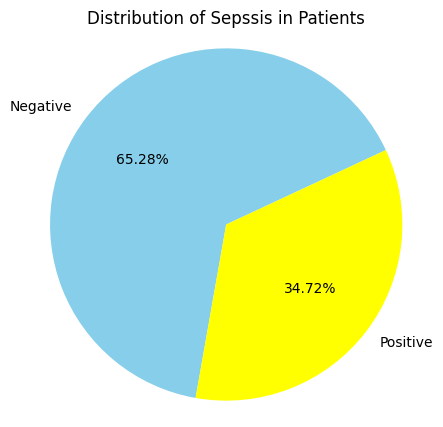

In [138]:
# Getting the counts of Sepssis

sepssis_counts = pfiles_df['Sepssis'].value_counts()
explode = [0.05 if label == 'Yes' else 0 for label in sepssis_counts.index]

plt.figure(figsize=(5, 5))  
plt.pie(sepssis_counts, labels=sepssis_counts.index, explode=explode, autopct='%1.2f%%', startangle=25, colors=['skyblue', 'yellow'])
plt.axis('equal')
plt.title('Distribution of Sepssis in Patients')
plt.show()

#### Feature Engineering

In [139]:
# Treating outliers
def replace_outliers(pfiles_df):
        for column_name in pfiles_df.select_dtypes(include=['number']).columns:
            Q1 = pfiles_df[column_name].quantile(0.25)
            Q3 = pfiles_df[column_name].quantile(0.75)
            IQR = Q3 - Q1

            LOWER_BOUND = Q1 - 1.5 * IQR
            UPPER_BOUND = Q3 + 1.5 * IQR

            pfiles_df[column_name] = pfiles_df[column_name].apply(lambda x: UPPER_BOUND if x> UPPER_BOUND else (LOWER_BOUND if x< LOWER_BOUND else x))

        return pfiles_df

In [140]:
pfiles_df1= replace_outliers(pfiles_df)

In [141]:
pfiles_df1.head()

ID  PRG     PL    PR    SK     TS   M11     BD2   Age  Insurance  \
0  ICU200010  6.0  148.0  72.0  35.0    0.0  33.6  0.6270  50.0          0   
1  ICU200011  1.0   85.0  66.0  29.0    0.0  26.6  0.3510  31.0          0   
2  ICU200012  8.0  183.0  64.0   0.0    0.0  23.3  0.6720  32.0          1   
3  ICU200013  1.0   89.0  66.0  23.0   94.0  28.1  0.1670  21.0          1   
4  ICU200014  0.0  137.0  40.0  35.0  168.0  43.1  1.2455  33.0          1   

    Sepssis  
0  Positive  
1  Negative  
2  Positive  
3  Negative  
4  Positive

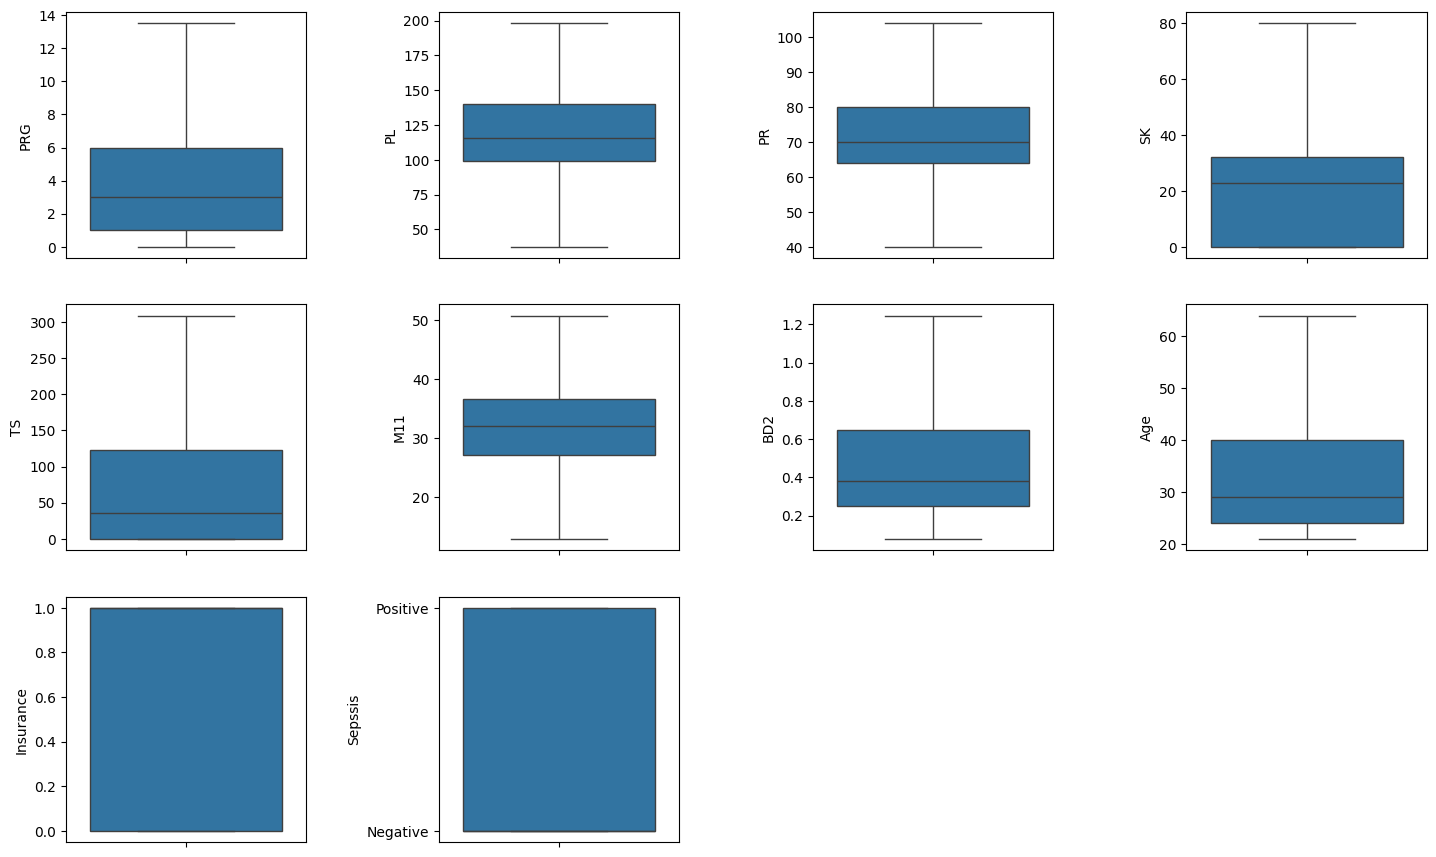

In [142]:
plt.figure(figsize=(15, 15))

pfiles_df1_noid = pfiles_df1.drop(['ID'], axis=1)

for i, variable in enumerate(pfiles_df1_noid):
    plt.subplot(5,4, i + 1)
    sns.boxplot(pfiles_df1_noid,y=pfiles_df1_noid[variable])
    plt.tight_layout(pad=3)
    plt.xticks(rotation=45)

#### Dataset Splitting

In [143]:
#X = pfiles_df_noid.drop(columns=['Sepssis']) 

#y = pfiles_df_noid['Sepssis'] 

X = pfiles_df1.drop(columns=['Sepssis']) 

y = pfiles_df1['Sepssis'] 

In [144]:
X.isnull().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
dtype: int64

In [145]:
y.isnull().sum()

np.int64(0)

In [146]:
# Splitting the data into training and evaluation sets for both features and labels
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [147]:
print(f'X_train shape: {X_train.shape}\nX_eval shape: {X_eval.shape}\ny_train shape: {y_train.shape}\ny_eval shape: {y_eval.shape}')

X_train shape: (449, 10)
X_eval shape: (150, 10)
y_train shape: (449,)
y_eval shape: (150,)


#### Label Encoding

In [148]:
#Encoding dependent variables
encoder=LabelEncoder()

y_train_encode=encoder.fit_transform(y_train)
y_eval_encode=encoder.transform(y_eval)

Normalising the variables


In [149]:
numerical_cols=X_train.select_dtypes(include='number').columns

#numerical pipeline

num_pipeline = Pipeline([
    ('num_imputer', SimpleImputer(strategy='mean')),
    #('log_transform', LogTransformer()),
    ('sqrt_transform', SqrtTransformer()),
    #('boxcox_transform', BoxCoxTransformer()),
    ('num_scaler', RobustScaler())
])


preprocessor = ColumnTransformer(transformers=[
    ('num_pipeline', num_pipeline, numerical_cols)
])

#### Models

In [150]:
models={}
models['Logistic_Regression']= LogisticRegression(random_state=42)
models['Support_Vector_Machine']= LinearSVC(random_state=42)
models['Decision_Tree']= DecisionTreeClassifier(random_state=42)
models['Random_Forest']= RandomForestClassifier(random_state=42)
models['Naive_Bayes']= GaussianNB()
models['K-Nearest_Neighbors']= KNeighborsClassifier()
models['Gradient_Boosting']= GradientBoostingClassifier(random_state=42)
models['XGBoost']= XGBClassifier(random_state=42)


### Modeling Unbalanced Data

In [151]:
# Creating Pipeline

all_pipelines_unbalanced = {}
metric_table_unbalanced = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1-score'])

for model_name, classifier in models.items(): 
    unbalanced_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor), 
        ('classifier', classifier)  
    ])
        
    unbalanced_pipeline.fit(X_train, y_train_encode)
    all_pipelines_unbalanced[model_name] = unbalanced_pipeline
    
    y_pred=unbalanced_pipeline.predict(X_eval)
    
    metrics= classification_report(y_eval_encode, y_pred, output_dict=True)
    
    accuracy=metrics['accuracy']
    precision=metrics['weighted avg']['precision']
    recall=metrics['weighted avg']['recall']
    f1_score=metrics['weighted avg']['f1-score']
    
    metric_table_unbalanced.loc[len(metric_table_unbalanced)]=[model_name, accuracy, precision, recall, f1_score]

metric_table_unbalanced.sort_values(by='f1-score', ascending=False)

model_name  accuracy  precision    recall  f1-score
6       Gradient_Boosting  0.766667   0.761481  0.766667  0.762270
4             Naive_Bayes  0.760000   0.758000  0.760000  0.758859
3           Random_Forest  0.746667   0.740057  0.746667  0.741078
0     Logistic_Regression  0.740000   0.735063  0.740000  0.736668
5     K-Nearest_Neighbors  0.740000   0.735063  0.740000  0.736668
1  Support_Vector_Machine  0.740000   0.735063  0.740000  0.736668
7                 XGBoost  0.693333   0.693333  0.693333  0.693333
2           Decision_Tree  0.693333   0.680424  0.693333  0.682179

### Modeling balanced Data

In [152]:
# Creating Pipeline

all_pipelines_balanced= {}
metric_table_balanced = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1-score'])

for model_name, classifier in models.items(): 
    balanced_pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=5)), 
        ('classifier', classifier)  
    ])
        
    balanced_pipeline.fit(X_train, y_train_encode)
    all_pipelines_balanced[model_name] = balanced_pipeline
    
    y_pred=balanced_pipeline.predict(X_eval)
    
    metrics= classification_report(y_eval_encode, y_pred, output_dict=True)
    
    accuracy=metrics['accuracy']
    precision=metrics['weighted avg']['precision']
    recall=metrics['weighted avg']['recall']
    f1_score=metrics['weighted avg']['f1-score']
    
    metric_table_balanced.loc[len(metric_table_balanced)]=[model_name, accuracy, precision, recall, f1_score]

metric_table_balanced.sort_values(by='f1-score', ascending=False)

model_name  accuracy  precision    recall  f1-score
6       Gradient_Boosting  0.766667   0.765657  0.766667  0.766126
1  Support_Vector_Machine  0.753333   0.763042  0.753333  0.756543
0     Logistic_Regression  0.746667   0.758222  0.746667  0.750324
4             Naive_Bayes  0.733333   0.752810  0.733333  0.738431
3           Random_Forest  0.726667   0.730667  0.726667  0.728374
5     K-Nearest_Neighbors  0.713333   0.739749  0.713333  0.719522
7                 XGBoost  0.680000   0.680000  0.680000  0.680000
2           Decision_Tree  0.653333   0.656528  0.653333  0.654817

#### Hyperparameters tuning

Tuning unbalanced data


In [153]:
# Define preprocessor pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num_pipeliner', num_pipeline, numerical_cols),
    
])

# Create pipelines for each model
pipelines = {}
for model_name, model in models.items():
    pipelines[model_name] = Pipeline(steps=[
        ('preprocessor', preprocessor),
        (model_name.lower().replace(' ', '_'), model)
    ])

# Define parameter grids for each model
param_grids = {
    'Logistic_Regression': {'logistic_regression__C': [1, 2, 3, 4, 5], 'logistic_regression__random_state':[1,2,3,4,5,6,7,8,9,10,11,1], 'logistic_regression__solver': ['newton-cg', 'lbfgs'], 'logistic_regression__multi_class': ['multinomial']},
    'Support_Vector_Machine': {'support_vector_machine__C': [1, 2, 3, 4, 5], 'support_vector_machine__random_state':[1,2,3,4,5,6,7,8,9,10,11,12]},
    'Decision_Tree': {'decision_tree__max_depth': [2, 3, 4, 5], 'decision_tree__random_state':[23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44], 'decision_tree__criterion': ['gini', 'entropy'], 'decision_tree__splitter': ['best', 'random'], 'decision_tree__max_features': ['sqrt', 'log2']},
    'Random_Forest': {'random_forest__n_estimators': [5, 10, 20], 'random_forest__max_depth': [2, 5, 10], 'random_forest__random_state':[10,11,12,13,14,15,16,17,18,19,20,21], 'random_forest__criterion': ['gini', 'entropy'], 'random_forest__max_features': ['auto', 'sqrt', 'log2'], 'random_forest__bootstrap': [True, False], 'random_forest__oob_score': [True, False]},
    'Gradient_Boosting': {'gradient_boosting__n_estimators': [100, 150, 200, 250, 300], 'gradient_boosting__max_depth': [2, 3, 4, 5], 'gradient_boosting__learning_rate': [0.001, 0.01, 0.1, 1], 'gradient_boosting__random_state':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], 'gradient_boosting__loss': ['deviance', 'exponential'], 'gradient_boosting__criterion': ['friedman_mse', 'squared_error']},
    'XGBoost': {'xgboost__n_estimators': [5, 10, 20, 30], 'xgboost__max_depth': [2, 3], 'xgboost__random_state':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], 'xgboost__learning_rate': [0.01, 0.1, 1], 'xgboost__booster': ['gbtree', 'gblinear'], 'xgboost__verbosity': [0, 1, 2]}

}

# Perform grid search for each model
for model_name, pipeline in pipelines.items():
    if model_name in ['Logistic_Regression', 'Support_Vector_Machine', 'Decision_Tree', 'Random_Forest', 'Gradient_Boosting', 'XGBoost']:
        print(f"\nTuning {model_name}...")
        grid_search = GridSearchCV(pipeline, param_grids[model_name], cv=5, scoring='f1_weighted', n_jobs=-1)
        grid_search.fit(X_train, y_train_encode)  
    
    # Print best parameters and score
    print("Best parameters:", grid_search.best_params_)
    print("Best score:", grid_search.best_score_)


Tuning Logistic_Regression...


/Users/mac/Documents/P5-Machine-Learning-API/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/mac/Documents/P5-Machine-Learning-API/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/mac/Documents/P5-Machine-Learning-API/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1

Best parameters: {'logistic_regression__C': 4, 'logistic_regression__multi_class': 'multinomial', 'logistic_regression__random_state': 1, 'logistic_regression__solver': 'newton-cg'}
Best score: 0.7578751280842504

Tuning Support_Vector_Machine...
Best parameters: {'support_vector_machine__C': 4, 'support_vector_machine__random_state': 1}
Best score: 0.7598994406285074

Tuning Decision_Tree...
Best parameters: {'decision_tree__criterion': 'entropy', 'decision_tree__max_depth': 3, 'decision_tree__max_features': 'sqrt', 'decision_tree__random_state': 43, 'decision_tree__splitter': 'best'}
Best score: 0.7745588453284233

Tuning Random_Forest...


/Users/mac/Documents/P5-Machine-Learning-API/.venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/mac/Documents/P5-Machine-Learning-API/.venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/mac/Documents/P5-Machine-Learning-API/.venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/mac/Documents/P5-Machine-Learning-API/.venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.


Best parameters: {'random_forest__bootstrap': False, 'random_forest__criterion': 'entropy', 'random_forest__max_depth': 10, 'random_forest__max_features': 'sqrt', 'random_forest__n_estimators': 10, 'random_forest__oob_score': False, 'random_forest__random_state': 13}
Best score: 0.7709384748308625
Best parameters: {'random_forest__bootstrap': False, 'random_forest__criterion': 'entropy', 'random_forest__max_depth': 10, 'random_forest__max_features': 'sqrt', 'random_forest__n_estimators': 10, 'random_forest__oob_score': False, 'random_forest__random_state': 13}
Best score: 0.7709384748308625
Best parameters: {'random_forest__bootstrap': False, 'random_forest__criterion': 'entropy', 'random_forest__max_depth': 10, 'random_forest__max_features': 'sqrt', 'random_forest__n_estimators': 10, 'random_forest__oob_score': False, 'random_forest__random_state': 13}
Best score: 0.7709384748308625

Tuning Gradient_Boosting...


KeyboardInterrupt: 

Tuned unbalanced models

In [ ]:
tuned_models={}
tuned_models['Logistic_Regression_tunedub'] = LogisticRegression(C=4, multi_class='multinomial', solver='newton-cg', random_state=1)
tuned_models['Support_Vector_Machine_tunedub']= LinearSVC(C=4, random_state=1)
tuned_models['Decision_Tree_tunedub'] = DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='sqrt', splitter='best', random_state=43)
tuned_models['Random_Forest_tunedub'] = RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=10, max_features='sqrt', n_estimators=10, oob_score=False, random_state=13)
tuned_models['Naive_Bayes_tunedub'] = GaussianNB()
tuned_models['K-Nearest_Neighbors_tunedub'] = KNeighborsClassifier()
tuned_models['Gradient_Boosting_tunedub'] = GradientBoostingClassifier(criterion='friedman_mse', learning_rate=0.01, loss='exponential', max_depth=4, n_estimators=300, random_state=2)
tuned_models['XGBoost_tunedub'] = XGBClassifier(booster='gbtree', learning_rate=0.1, max_depth=2, n_estimators=30, verbosity=0, random_state=1)

In [ ]:

all_tuned_pipelines_unbalanced = {}
metric_table_tuned_unbalanced = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1-score'])

for model_name, classifier in tuned_models.items(): 
    tuned_unbalanced_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor), 
        ('classifier', classifier)  
    ])
        
    tuned_unbalanced_pipeline.fit(X_train, y_train_encode)
    all_tuned_pipelines_unbalanced[model_name] = tuned_unbalanced_pipeline
    
    y_pred=tuned_unbalanced_pipeline.predict(X_eval)
    
    metrics_tuned= classification_report(y_eval_encode, y_pred, output_dict=True)
    
    accuracy=metrics_tuned['accuracy']
    precision=metrics_tuned['weighted avg']['precision']
    recall=metrics_tuned['weighted avg']['recall']
    f1_score=metrics_tuned['weighted avg']['f1-score']
    
    metric_table_tuned_unbalanced.loc[len(metric_table_tuned_unbalanced)]=[model_name, accuracy, precision, recall, f1_score]

metric_table_tuned_unbalanced.sort_values(by='f1-score', ascending=False)

model_name  accuracy  precision    recall  f1-score
4             Naive_Bayes_tunedub  0.760000   0.758000  0.760000  0.758859
6       Gradient_Boosting_tunedub  0.753333   0.746696  0.753333  0.747064
0     Logistic_Regression_tunedub  0.746667   0.742712  0.746667  0.744133
2           Decision_Tree_tunedub  0.746667   0.740057  0.746667  0.741078
5     K-Nearest_Neighbors_tunedub  0.740000   0.735063  0.740000  0.736668
1  Support_Vector_Machine_tunedub  0.740000   0.735063  0.740000  0.736668
7                 XGBoost_tunedub  0.726667   0.723268  0.726667  0.724668
3           Random_Forest_tunedub  0.726667   0.717330  0.726667  0.717764

Tuning on balanced data

In [ ]:
# Define preprocessor pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num_pipeliner', num_pipeline, numerical_cols),
])

# Create pipelines for each model
pipelines = {}
for model_name, model in models.items():
    pipelines[model_name] = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=5)),
        (model_name.lower().replace(' ', '_'), model)
    ])

# Define parameter grids for each model
param_grids = {
    'Logistic_Regression': {'logistic_regression__C': [1, 2, 3], 'logistic_regression__random_state':[1,2,3,4,5,6,7,8,9,10,11,12,13,14], 'logistic_regression__solver': ['newton-cg', 'lbfgs'], 'logistic_regression__multi_class': ['multinomial']},
    'Support_Vector_Machine': {'support_vector_machine__C': [1, 2, 3, 4, 5, 6, 7, 8], 'support_vector_machine__random_state':[1,2,3,4,5,6,7,8,9,10,11,12,13,14]},
    'Decision_Tree': {'decision_tree__max_depth': [2, 3, 4, 5, 6], 'decision_tree__random_state':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], 'decision_tree__criterion': ['gini', 'entropy'], 'decision_tree__splitter': ['best', 'random'], 'decision_tree__max_features': ['sqrt', 'log2']},
    'Random_Forest': {'random_forest__n_estimators': [2, 5, 10, 15, 20], 'random_forest__max_depth': [5, 10, 20, 30], 'random_forest__random_state':[10,11,12,13,14,15,16,17], 'random_forest__criterion': ['gini', 'entropy'], 'random_forest__max_features': ['sqrt', 'log2'], 'random_forest__bootstrap': [True, False], 'random_forest__oob_score': [True, False]},
    'Gradient_Boosting': {'gradient_boosting__n_estimators': [50, 60, 70, 80, 90, 100], 'gradient_boosting__max_depth': [2, 3, 4, 5], 'gradient_boosting__learning_rate': [0.01, 0.1, 1], 'gradient_boosting__random_state':[25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43], 'gradient_boosting__loss': ['deviance', 'exponential'], 'gradient_boosting__criterion': ['friedman_mse', 'squared_error']},
    'XGBoost': {'xgboost__n_estimators': [20, 30, 40], 'xgboost__max_depth': [2, 3], 'xgboost__random_state':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], 'xgboost__learning_rate': [0.001, 0.01, 0.1, 1], 'xgboost__booster': ['gbtree', 'gblinear'], 'xgboost__verbosity': [0, 1, 2]}

}

# Perform grid search for each model
for model_name, pipeline in pipelines.items():
    if model_name in ['Logistic_Regression', 'Support_Vector_Machine', 'Decision_Tree', 'Random_Forest', 'Gradient_Boosting', 'XGBoost']:
        print(f"\nTuning {model_name}...")
        grid_search = GridSearchCV(pipeline, param_grids[model_name], cv=5, scoring='f1_weighted', n_jobs=-1)
        grid_search.fit(X_train, y_train_encode)  
    
    # Print best parameters and score
    print("Best parameters:", grid_search.best_params_)
    print("Best score:", grid_search.best_score_)


Tuning Logistic_Regression...


/Users/mac/Documents/P5-Machine-Learning-API/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/mac/Documents/P5-Machine-Learning-API/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/mac/Documents/P5-Machine-Learning-API/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1

Best parameters: {'logistic_regression__C': 1, 'logistic_regression__multi_class': 'multinomial', 'logistic_regression__random_state': 1, 'logistic_regression__solver': 'newton-cg'}
Best score: 0.7287302212160501

Tuning Support_Vector_Machine...
Best parameters: {'support_vector_machine__C': 1, 'support_vector_machine__random_state': 1}
Best score: 0.735390894791747

Tuning Decision_Tree...
Best parameters: {'decision_tree__criterion': 'gini', 'decision_tree__max_depth': 4, 'decision_tree__max_features': 'sqrt', 'decision_tree__random_state': 4, 'decision_tree__splitter': 'best'}
Best score: 0.7376144977727366

Tuning Random_Forest...


/Users/mac/Documents/P5-Machine-Learning-API/.venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/mac/Documents/P5-Machine-Learning-API/.venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/mac/Documents/P5-Machine-Learning-API/.venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/mac/Documents/P5-Machine-Learning-API/.venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.


Best parameters: {'random_forest__bootstrap': True, 'random_forest__criterion': 'entropy', 'random_forest__max_depth': 5, 'random_forest__max_features': 'sqrt', 'random_forest__n_estimators': 10, 'random_forest__oob_score': True, 'random_forest__random_state': 14}
Best score: 0.7675178086363152
Best parameters: {'random_forest__bootstrap': True, 'random_forest__criterion': 'entropy', 'random_forest__max_depth': 5, 'random_forest__max_features': 'sqrt', 'random_forest__n_estimators': 10, 'random_forest__oob_score': True, 'random_forest__random_state': 14}
Best score: 0.7675178086363152
Best parameters: {'random_forest__bootstrap': True, 'random_forest__criterion': 'entropy', 'random_forest__max_depth': 5, 'random_forest__max_features': 'sqrt', 'random_forest__n_estimators': 10, 'random_forest__oob_score': True, 'random_forest__random_state': 14}
Best score: 0.7675178086363152

Tuning Gradient_Boosting...
Best parameters: {'gradient_boosting__criterion': 'friedman_mse', 'gradient_boostin

/Users/mac/Documents/P5-Machine-Learning-API/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [13:44:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/mac/Documents/P5-Machine-Learning-API/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [13:44:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/mac/Documents/P5-Machine-Learning-API/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [13:44:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/mac/Documents/P5-Machine-Learning-API/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [13:44:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters

Best parameters: {'xgboost__booster': 'gbtree', 'xgboost__learning_rate': 0.1, 'xgboost__max_depth': 3, 'xgboost__n_estimators': 30, 'xgboost__random_state': 1, 'xgboost__verbosity': 0}
Best score: 0.7503009245038894


/Users/mac/Documents/P5-Machine-Learning-API/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [13:44:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/mac/Documents/P5-Machine-Learning-API/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [13:44:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/mac/Documents/P5-Machine-Learning-API/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [13:44:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/mac/Documents/P5-Machine-Learning-API/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [13:44:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters

Tuned balanced Models

In [154]:
tuned_models_balanced = {}
tuned_models_balanced['Logistic_Regression_tunedb'] = LogisticRegression(C=1, multi_class='multinomial', solver='newton-cg', random_state=1)
tuned_models_balanced['Support_Vector_Machine_tunedb'] = LinearSVC(C=1, random_state=1)
tuned_models_balanced['Decision_Tree_tunedb'] = DecisionTreeClassifier(criterion='gini', max_depth=4, max_features='sqrt', splitter='best', random_state=4)
tuned_models_balanced['Random_Forest_tunedb'] = RandomForestClassifier(bootstrap=True, criterion='entropy', max_depth=5, max_features='sqrt', n_estimators=10, oob_score=True, random_state=14)
tuned_models_balanced['Naive_Bayes_tunedb'] = GaussianNB()
tuned_models_balanced['K-Nearest_Neighbors_tunedb'] = KNeighborsClassifier()
tuned_models_balanced['Gradient_Boosting_tunedb'] = GradientBoostingClassifier(criterion='friedman_mse', learning_rate=0.1, loss='exponential', max_depth=3, n_estimators=70, random_state=30)
tuned_models_balanced['XGBoost_tunedb'] = XGBClassifier(booster='gbtree', learning_rate=0.1, max_depth=3, n_estimators=30, verbosity=0, random_state=1)

In [155]:
all_tuned_pipelines_balanced= {}
metric_table_balanced_tuned = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1-score'])

for model_name, classifier in tuned_models_balanced.items(): 
    tuned_balanced_pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=5)), 
        ('classifier', classifier)  
    ])
        
    tuned_balanced_pipeline.fit(X_train, y_train_encode)
    all_tuned_pipelines_balanced[model_name] = tuned_balanced_pipeline
    
    y_pred = tuned_balanced_pipeline.predict(X_eval)
    
    metrics_tunedb = classification_report(y_eval_encode, y_pred, output_dict=True)
    
    accuracy = metrics_tunedb['accuracy']
    precision = metrics_tunedb['weighted avg']['precision']
    recall = metrics_tunedb['weighted avg']['recall']
    f1_score = metrics_tunedb['weighted avg']['f1-score']
    
    metric_table_balanced_tuned.loc[len(metric_table_balanced_tuned)] = [model_name, accuracy, precision, recall, f1_score]

metric_table_balanced_tuned.sort_values(by='f1-score', ascending=False)

model_name  accuracy  precision    recall  f1-score
7                 XGBoost_tunedb  0.766667   0.779542  0.766667  0.770344
6       Gradient_Boosting_tunedb  0.760000   0.764985  0.760000  0.761944
0     Logistic_Regression_tunedb  0.753333   0.763042  0.753333  0.756543
1  Support_Vector_Machine_tunedb  0.753333   0.763042  0.753333  0.756543
4             Naive_Bayes_tunedb  0.733333   0.752810  0.733333  0.738431
3           Random_Forest_tunedb  0.726667   0.736932  0.726667  0.730224
2           Decision_Tree_tunedb  0.720000   0.748580  0.720000  0.726222
5     K-Nearest_Neighbors_tunedb  0.713333   0.739749  0.713333  0.719522

### Observations

- **Gradient_Boosting_tunedb** recording F1 score of 0.76498
- **XGBoost_tunedb** recording F1 score of 0.7703 
- **Logistic_Regression_tunedb** recording F1 score os 	0.7565
- **Support_Vector_Machine_tunedb** recording F1 score os 0.756543
- **Naive_Bayes_tunedb** recording F1 score os 	0.738431


**Plotting confusion metrix of tuned models for balanced labels** 

In [156]:
all_confusion_matrices_tunedb = {}
all_tuned_pipelines_balanced = {}
metric_table_tuned_balanced = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1-score'])

for model_name, classifier in tuned_models_balanced.items(): 
    tuned_balanced_pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=5)), 
        ('classifier', classifier)  
    ])
        
    tuned_unbalanced_pipeline.fit(X_train, y_train_encode)
    all_tuned_pipelines_balanced[model_name] = tuned_balanced_pipeline
    
    y_pred=tuned_balanced_pipeline.predict(X_eval)
    
    conf_matrix_tunedb = confusion_matrix(y_eval_encode, y_pred)
    
    all_confusion_matrices_tunedb[model_name]=conf_matrix_tunedb
    
    metrics_tuned= classification_report(y_eval_encode, y_pred, output_dict=True)
    
    accuracy=metrics_tuned['accuracy']
    precision=metrics_tuned['weighted avg']['precision']
    recall=metrics_tuned['weighted avg']['recall']
    f1_score=metrics_tuned['weighted avg']['f1-score']
    
    metric_table_tuned_balanced.loc[len(metric_table_tuned_balanced)]=[model_name, accuracy, precision, recall, f1_score]

metric_table_tuned_balanced.sort_values(by='f1-score', ascending=False)

model_name  accuracy  precision    recall  f1-score
7                 XGBoost_tunedb  0.766667   0.779542  0.766667  0.770344
6       Gradient_Boosting_tunedb  0.760000   0.764985  0.760000  0.761944
0     Logistic_Regression_tunedb  0.753333   0.763042  0.753333  0.756543
1  Support_Vector_Machine_tunedb  0.753333   0.763042  0.753333  0.756543
4             Naive_Bayes_tunedb  0.733333   0.752810  0.733333  0.738431
3           Random_Forest_tunedb  0.726667   0.736932  0.726667  0.730224
2           Decision_Tree_tunedb  0.720000   0.748580  0.720000  0.726222
5     K-Nearest_Neighbors_tunedb  0.713333   0.739749  0.713333  0.719522

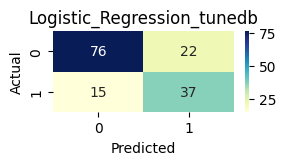

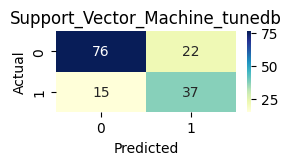

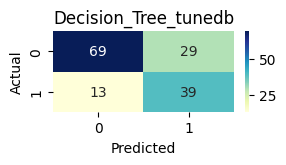

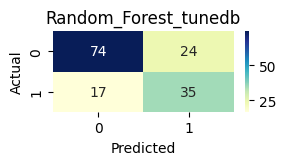

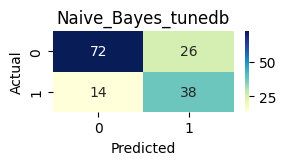

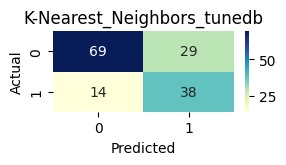

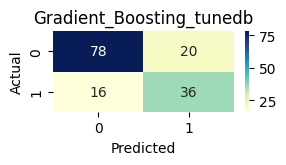

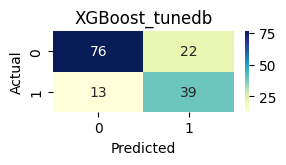

In [157]:
for i, (model_name, confusion_mat_b) in enumerate(all_confusion_matrices_tunedb.items()):
    
    plt.subplot(4, 2, i + 1)
    sns.heatmap(confusion_mat_b, annot=True, fmt='d', cmap='YlGnBu')
    plt.title(model_name)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

Per confusion matrixes, the top 3 best models are

- XGBoost_tunedb
- Gradient_Boosting_tunedb
- Logistic_Regression_tunedb 
- Support_Vector_Machine_tunedb

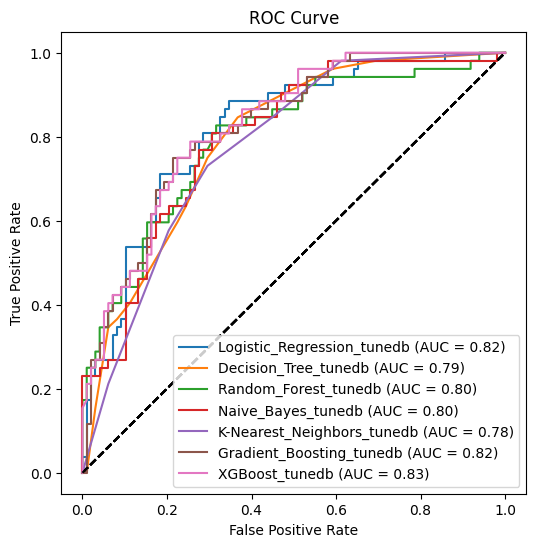

In [158]:
fig, ax = plt.subplots(figsize=(6, 6))
all_confusion_matrices_tunedb = {}

all_roc_data_tunedb = {}

# Iterate over the dictionary items directly
for model_name, pipeline in all_tuned_pipelines_balanced.items():
    
    # Check if the classifier is LinearSVC
    if isinstance(pipeline.named_steps['classifier'], LinearSVC):
        # Fit the pipeline first
        pipeline.fit(X_train, y_train_encode)
        # Wrap LinearSVC with CalibratedClassifierCV
        calibrated_pipeline = CalibratedClassifierCV(pipeline.named_steps['classifier'], method='sigmoid', cv='prefit')
        # Fit the CalibratedClassifierCV instance with training data
        calibrated_pipeline.fit(pipeline.named_steps['preprocessor'].transform(X_train), y_train_encode)
        y_score = calibrated_pipeline.predict_proba(pipeline.named_steps['preprocessor'].transform(X_eval))[:, 1]
    else:
        # For classifiers that have predict_proba directly
        y_score = pipeline.predict_proba(X_eval)[:, 1]
    
        fpr, tpr, thresholds = roc_curve(y_eval_encode, y_score)
        roc_auc = auc(fpr, tpr)
    
    
        roc_data_df = pd.DataFrame({'false_positive_rate': fpr, 'true_positive_rate': tpr, 'thresholds': thresholds})
    
        # Store the ROC data in the dictionary
        all_roc_data_tunedb[model_name] = roc_data_df
        ax.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_ylabel('True Positive Rate')
        ax.set_xlabel('False Positive Rate')
        ax.set_title('ROC Curve')
        ax.legend(loc="lower right")
plt.show()


#### Best Performing Models per ROC Curves

- XGBoost_tunedub, Gradient_Boosting_tunedub and Logistic_Regression_tunedub are the top 3 per AUC scores, scoring 0.83, 0.82 and 0.82 respectively

In [159]:
all_roc_data_tunedb['XGBoost_tunedb']

false_positive_rate  true_positive_rate  thresholds
0              0.000000            0.000000         inf
1              0.000000            0.019231    0.929710
2              0.000000            0.096154    0.892558
3              0.000000            0.134615    0.886288
4              0.000000            0.153846    0.884229
5              0.010204            0.173077    0.874801
6              0.010204            0.211538    0.868875
7              0.020408            0.211538    0.864029
8              0.020408            0.250000    0.850781
9              0.030612            0.250000    0.839838
10             0.030612            0.269231    0.828499
11             0.051020            0.269231    0.782346
12             0.051020            0.307692    0.778179
13             0.051020            0.384615    0.757168
14             0.061224            0.384615    0.749533
15             0.061224            0.403846    0.744934
16             0.071429            0.403846    0.739604
17             0.071429            0.423077    0.727401
18             0.091837            0.423077    0.723380
19             0.091837            0.442308    0.718427
20             0.112245            0.442308    0.714517
21             0.112245            0.480769    0.701365
22             0.153061            0.480769    0.673649
23             0.153061            0.519231    0.658326
24             0.163265            0.519231    0.657934
25             0.163265            0.615385    0.593438
26             0.173469            0.615385    0.592508
27             0.173469            0.634615    0.591162
28             0.183673            0.634615    0.589500
29             0.183673            0.673077    0.560990
30             0.204082            0.673077    0.538706
31             0.204082            0.692308    0.534667
32             0.214286            0.692308    0.531346
33             0.214286            0.711538    0.529404
34             0.224490            0.711538    0.510083
35             0.224490            0.750000    0.504129
36             0.255102            0.750000    0.488975
37             0.255102            0.788462    0.477037
38             0.326531            0.788462    0.426335
39             0.326531            0.807692    0.421066
40             0.346939            0.807692    0.391361
41             0.346939            0.826923    0.390940
42             0.377551            0.826923    0.315224
43             0.377551            0.865385    0.283283
44             0.418367            0.865385    0.248688
45             0.418367            0.884615    0.247455
46             0.479592            0.884615    0.186733
47             0.479592            0.903846    0.184335
48             0.510204            0.903846    0.177899
49             0.510204            0.961538    0.170934
50             0.591837            0.961538    0.150106
51             0.591837            0.980769    0.149250
52             0.622449            0.980769    0.132567
53             0.622449            1.000000    0.129592
54             0.642857            1.000000    0.124341
55             0.663265            1.000000    0.121996
56             0.846939            1.000000    0.073961
57             0.867347            1.000000    0.073939
58             1.000000            1.000000    0.041531

In [ ]:
XGB_pipeline = all_tuned_pipelines_balanced['XGBoost_tunedb']
XGB_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeliner',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('sqrt_transform',
                                                                   SqrtTransformer()),
                                                                  ('num_scaler',
                                                                   RobustScaler())]),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object'))])),
                ('smote', SMOTE(random_state=5)),
                ('classifier',
                 XGBClassifier(base_sco...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=30, n_jobs=None,
                               num_parallel_tree=None, random_state=1, ...))])

<Axes: >

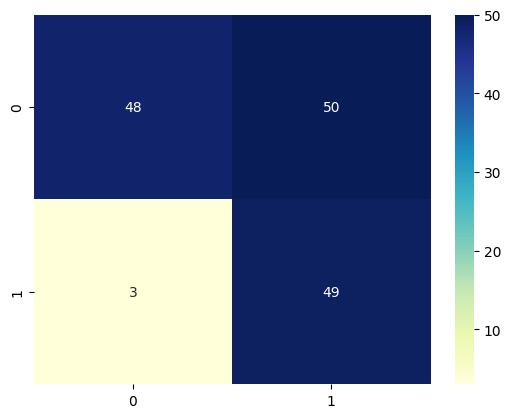

In [160]:
threshold = 0.170934

y_pred_proba = XGB_pipeline.predict_proba(X_eval)[:, 1]

binary_predictions = (y_pred_proba >= threshold).astype(int)
threshold_matrix = confusion_matrix(y_eval_encode, binary_predictions)

sns.heatmap(threshold_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [161]:
all_roc_data_tunedb['Gradient_Boosting_tunedb'].tail(40)

false_positive_rate  true_positive_rate  thresholds
16             0.102041            0.461538    0.758705
17             0.112245            0.461538    0.753243
18             0.112245            0.480769    0.723752
19             0.132653            0.480769    0.713838
20             0.132653            0.500000    0.686879
21             0.153061            0.500000    0.666882
22             0.153061            0.557692    0.646280
23             0.163265            0.557692    0.641636
24             0.163265            0.615385    0.580659
25             0.173469            0.615385    0.575506
26             0.173469            0.673077    0.554295
27             0.193878            0.673077    0.529403
28             0.193878            0.692308    0.524536
29             0.214286            0.692308    0.481794
30             0.214286            0.750000    0.441464
31             0.255102            0.750000    0.409307
32             0.255102            0.769231    0.408801
33             0.265306            0.769231    0.397452
34             0.265306            0.788462    0.388097
35             0.326531            0.788462    0.265630
36             0.326531            0.807692    0.262382
37             0.367347            0.807692    0.229408
38             0.367347            0.826923    0.212035
39             0.377551            0.826923    0.210115
40             0.377551            0.846154    0.197200
41             0.397959            0.846154    0.164959
42             0.397959            0.865385    0.156998
43             0.438776            0.865385    0.145025
44             0.438776            0.884615    0.144758
45             0.520408            0.884615    0.079423
46             0.520408            0.903846    0.070810
47             0.530612            0.903846    0.066330
48             0.530612            0.942308    0.061781
49             0.581633            0.942308    0.044089
50             0.581633            0.961538    0.044034
51             0.591837            0.961538    0.043992
52             0.591837            0.980769    0.043673
53             0.632653            0.980769    0.033180
54             0.632653            1.000000    0.032808
55             1.000000            1.000000    0.002682

In [162]:
GB_pipeline = all_tuned_pipelines_balanced['Gradient_Boosting_tunedb']
GB_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeliner',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('sqrt_transform',
                                                                   SqrtTransformer()),
                                                                  ('num_scaler',
                                                                   RobustScaler())]),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object'))])),
                ('smote', SMOTE(random_state=5)),
                ('classifier',
                 GradientBoostingClassifier(loss='exponential', n_estimators=70,
                                            random_state=30))])

<Axes: >

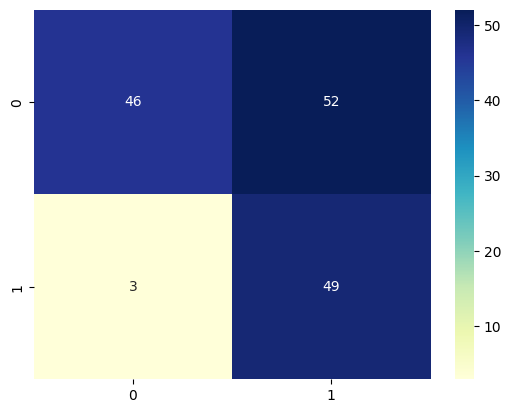

In [163]:
threshold = 0.061781

y_pred_proba = GB_pipeline.predict_proba(X_eval)[:, 1]

binary_predictions = (y_pred_proba >= threshold).astype(int)
GB_threshold_matrix = confusion_matrix(y_eval_encode, binary_predictions)

sns.heatmap(GB_threshold_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [164]:
all_roc_data_tunedb['Logistic_Regression_tunedb']

false_positive_rate  true_positive_rate  thresholds
0              0.000000            0.000000         inf
1              0.000000            0.019231    0.979143
2              0.000000            0.038462    0.975634
3              0.010204            0.038462    0.953586
4              0.010204            0.173077    0.926759
5              0.020408            0.173077    0.925819
6              0.020408            0.230769    0.901751
7              0.030612            0.230769    0.878561
8              0.030612            0.269231    0.858891
9              0.071429            0.269231    0.831739
10             0.071429            0.326923    0.809039
11             0.081633            0.326923    0.806852
12             0.081633            0.346154    0.802975
13             0.091837            0.346154    0.797662
14             0.091837            0.365385    0.797393
15             0.102041            0.365385    0.795279
16             0.102041            0.538462    0.747047
17             0.163265            0.538462    0.677861
18             0.163265            0.596154    0.660655
19             0.173469            0.596154    0.658152
20             0.173469            0.653846    0.624338
21             0.183673            0.653846    0.609931
22             0.183673            0.711538    0.597589
23             0.255102            0.711538    0.493131
24             0.255102            0.730769    0.487029
25             0.275510            0.730769    0.468042
26             0.275510            0.788462    0.454958
27             0.285714            0.788462    0.453053
28             0.285714            0.807692    0.447762
29             0.326531            0.807692    0.433721
30             0.326531            0.846154    0.430814
31             0.336735            0.846154    0.426309
32             0.336735            0.865385    0.382689
33             0.346939            0.865385    0.380288
34             0.346939            0.884615    0.375847
35             0.438776            0.884615    0.283734
36             0.438776            0.903846    0.253862
37             0.479592            0.903846    0.246598
38             0.479592            0.923077    0.231201
39             0.591837            0.923077    0.182536
40             0.591837            0.942308    0.177412
41             0.642857            0.942308    0.148741
42             0.642857            0.961538    0.142922
43             0.653061            0.961538    0.139277
44             0.653061            0.980769    0.138078
45             0.857143            0.980769    0.056726
46             0.857143            1.000000    0.051843
47             1.000000            1.000000    0.003605

In [165]:
LogReg_pipeline = all_tuned_pipelines_balanced['Logistic_Regression_tunedb']
LogReg_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeliner',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('sqrt_transform',
                                                                   SqrtTransformer()),
                                                                  ('num_scaler',
                                                                   RobustScaler())]),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object'))])),
                ('smote', SMOTE(random_state=5)),
                ('classifier',
                 LogisticRegression(C=1, multi_class='multinomial',
                                    random_state=1, solver='newton-cg'))])

<Axes: >

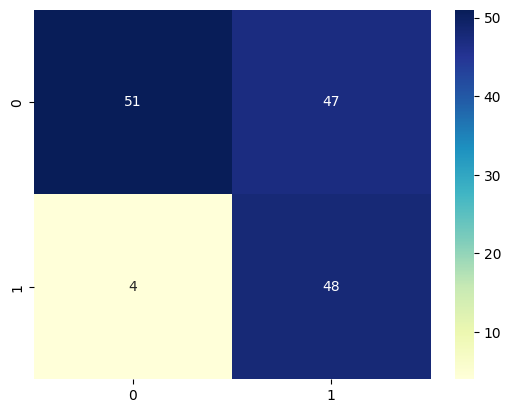

In [166]:
threshold = 0.231201

y_pred_proba = LogReg_pipeline.predict_proba(X_eval)[:, 1]

binary_predictions = (y_pred_proba >= threshold).astype(int)
LR_threshold_matrix = confusion_matrix(y_eval_encode, binary_predictions)

sns.heatmap(LR_threshold_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
#all_roc_data_tunedub['Random_Forest_tunedub']

In [ ]:
#RF_pipeline = all_tuned_pipelines_unbalanced['Random_Forest_tunedub']
#RF_pipeline

In [ ]:
#threshold = 0.132469

#y_pred_proba = RF_pipeline.predict_proba(X_eval)[:, 1]

#binary_predictions = (y_pred_proba >= threshold).astype(int)
#RF_threshold_matrix = confusion_matrix(y_eval_encode, binary_predictions)

#sns.heatmap(RF_threshold_matrix, annot=True, fmt='d', cmap='YlGnBu')

#### Testing the model with the XGB_pipeline

In [167]:
pfiles_test = pd.read_csv('/Users/mac/Documents/P5-Machine-Learning-API/Data/Paitients_Files_Test.csv')
pfiles_test.head()

ID  PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance
0  ICU200609    1  109  38  18  120  23.1  0.407   26          1
1  ICU200610    1  108  88  19    0  27.1  0.400   24          1
2  ICU200611    6   96   0   0    0  23.7  0.190   28          1
3  ICU200612    1  124  74  36    0  27.8  0.100   30          1
4  ICU200613    7  150  78  29  126  35.2  0.692   54          0

In [168]:
pfiles_test.shape

(169, 10)

In [169]:
pfiles_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         169 non-null    object 
 1   PRG        169 non-null    int64  
 2   PL         169 non-null    int64  
 3   PR         169 non-null    int64  
 4   SK         169 non-null    int64  
 5   TS         169 non-null    int64  
 6   M11        169 non-null    float64
 7   BD2        169 non-null    float64
 8   Age        169 non-null    int64  
 9   Insurance  169 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 13.3+ KB


In [170]:
pfiles_test.isna().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
dtype: int64

### Predicting with XGBoost Pipeline

In [171]:
XGB_pred_Sepsis = XGB_pipeline.predict(pfiles_test)
XGB_pred_Sepsis 

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0])

In [172]:
encoder.inverse_transform(XGB_pred_Sepsis)

array(['Negative', 'Negative', 'Negative', 'Negative', 'Positive',
       'Positive', 'Negative', 'Positive', 'Negative', 'Positive',
       'Negative', 'Negative', 'Positive', 'Positive', 'Positive',
       'Positive', 'Negative', 'Negative', 'Negative', 'Positive',
       'Negative', 'Positive', 'Negative', 'Positive', 'Negative',
       'Negative', 'Negative', 'Negative', 'Positive', 'Positive',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Positive', 'Negative', 'Negative', 'Positive',
       'Negative', 'Negative', 'Positive', 'Negative', 'Negative',
       'Negative', 'Positive', 'Positive', 'Positive', 'Negative',
       'Negative', 'Negative', 'Negative', 'Positive', 'Negative',
       'Negative', 'Positive', 'Negative', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Negative', 'Positive', 'Negative', 'Negative',
       'Positive', 'Positive', 'Negative', 'Negative', 'Negati

In [173]:
pfiles_test['XGB_sepsis'] = encoder.inverse_transform(XGB_pred_Sepsis)
pfiles_test.head(10)

ID  PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance XGB_sepsis
0  ICU200609    1  109  38  18  120  23.1  0.407   26          1   Negative
1  ICU200610    1  108  88  19    0  27.1  0.400   24          1   Negative
2  ICU200611    6   96   0   0    0  23.7  0.190   28          1   Negative
3  ICU200612    1  124  74  36    0  27.8  0.100   30          1   Negative
4  ICU200613    7  150  78  29  126  35.2  0.692   54          0   Positive
5  ICU200614    4  183   0   0    0  28.4  0.212   36          1   Positive
6  ICU200615    1  124  60  32    0  35.8  0.514   21          1   Negative
7  ICU200616    1  181  78  42  293  40.0  1.258   22          1   Positive
8  ICU200617    1   92  62  25   41  19.5  0.482   25          0   Negative
9  ICU200618    0  152  82  39  272  41.5  0.270   27          0   Positive

#### Predicting with GB_pipeline

In [174]:
GB_pred_Sepsis = GB_pipeline.predict(pfiles_test)
GB_pred_Sepsis

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0])

In [175]:
pfiles_test['GB_sepsis'] = encoder.inverse_transform(GB_pred_Sepsis)

pfiles_test.head(10)

ID  PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance XGB_sepsis  \
0  ICU200609    1  109  38  18  120  23.1  0.407   26          1   Negative   
1  ICU200610    1  108  88  19    0  27.1  0.400   24          1   Negative   
2  ICU200611    6   96   0   0    0  23.7  0.190   28          1   Negative   
3  ICU200612    1  124  74  36    0  27.8  0.100   30          1   Negative   
4  ICU200613    7  150  78  29  126  35.2  0.692   54          0   Positive   
5  ICU200614    4  183   0   0    0  28.4  0.212   36          1   Positive   
6  ICU200615    1  124  60  32    0  35.8  0.514   21          1   Negative   
7  ICU200616    1  181  78  42  293  40.0  1.258   22          1   Positive   
8  ICU200617    1   92  62  25   41  19.5  0.482   25          0   Negative   
9  ICU200618    0  152  82  39  272  41.5  0.270   27          0   Positive   

  GB_sepsis  
0  Negative  
1  Negative  
2  Negative  
3  Negative  
4  Positive  
5  Positive  
6  Negative  
7  Positive  
8  Negative  
9  Positive

#### Predicting with LogReg_pipeline

In [176]:
LR_pred_sepsis = LogReg_pipeline.predict(pfiles_test)
LR_pred_sepsis

array([0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0])

In [177]:
pfiles_test['LR_sepsis'] = encoder.inverse_transform(LR_pred_sepsis)

pfiles_test.head(10)

ID  PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance XGB_sepsis  \
0  ICU200609    1  109  38  18  120  23.1  0.407   26          1   Negative   
1  ICU200610    1  108  88  19    0  27.1  0.400   24          1   Negative   
2  ICU200611    6   96   0   0    0  23.7  0.190   28          1   Negative   
3  ICU200612    1  124  74  36    0  27.8  0.100   30          1   Negative   
4  ICU200613    7  150  78  29  126  35.2  0.692   54          0   Positive   
5  ICU200614    4  183   0   0    0  28.4  0.212   36          1   Positive   
6  ICU200615    1  124  60  32    0  35.8  0.514   21          1   Negative   
7  ICU200616    1  181  78  42  293  40.0  1.258   22          1   Positive   
8  ICU200617    1   92  62  25   41  19.5  0.482   25          0   Negative   
9  ICU200618    0  152  82  39  272  41.5  0.270   27          0   Positive   

  GB_sepsis LR_sepsis  
0  Negative  Negative  
1  Negative  Negative  
2  Negative  Negative  
3  Negative  Negative  
4  Positive  Positive  
5  Positive  Positive  
6  Negative  Positive  
7  Positive  Positive  
8  Negative  Negative  
9  Positive  Positive

Saving the top 4 best performing models

In [179]:
joblib.dump(XGB_pipeline, '/Users/mac/Documents/P5-Machine-Learning-API/models/XGB_pipeline.joblib')
joblib.dump(GB_pipeline, '/Users/mac/Documents/P5-Machine-Learning-API/models/GB_pipeline.joblib')
joblib.dump(LogReg_pipeline, '/Users/mac/Documents/P5-Machine-Learning-API/models/LogReg_pipeline.joblib')
joblib.dump(encoder, '/Users/mac/Documents/P5-Machine-Learning-API/models/encoder.joblib')

['/Users/mac/Documents/P5-Machine-Learning-API/models/encoder.joblib']

## Recommendation

Due to the dangerous nature of Sepsis, it will be bad for the model to have high fpr, it will therefore be helpful to reduce fpr as much as possible.